# PDIE8 - Processamento Digital de Imagem

![Capa](https://m.media-amazon.com/images/I/71wa841+qgL._AC_UF1000,1000_QL80_.jpg)

##### Repositorio dos Códigos feitos em aula da Disciplina

#### Feito por: Vinicius de Souza Santos
#### Lecionado por: Murilo Varges

## Aula 8 - 18/09 - Filtragem no domínio da frequência

* Propriedades da transformada de Fourier
* Filtragem no domínio da frequência
* Filtros passa-alta, passa baixa e passa  banda.

## Atividade: Filtragem Frequência

1.     Calcule e visualize o espectro de uma imagem 512x512 pixels:

    a)  crie e visualize uma imagem simples – quadrado branco sobre fundo preto;

    b)  calcular e visualizar seu espectro de Fourier (amplitudes);

    c)  calcular e visualizar seu espectro de Fourier (fases);

    d)  obter e visualizar seu espectro de Fourier centralizado;

    e)  Aplique uma rotação de 40º no quadrado e repita os passo b-d;

    f)  Aplique uma translação nos eixos x e y no quadrado e repita os passo b-d;

    g)  Aplique um zoom na imagem e repita os passo b-d;

    h)  Explique o que acontece com a transformada de Fourier quando é aplicado a rotação, translação e zoom.


2.     Crie filtros passa-baixa do tipo ideal, butterworth e gaussiano e aplique-o às imagens disponibilizadas. Visualize o seguinte:

    a)  a imagem inicial;

    b)  a imagem do spectro de fourier;

    c)  a imagem de cada filtro;

    d)  a imagem resultante após aplicação de cada filtro.
 

3.     Crie um filtro passa-alta do tipo ideal, butterworth e gaussiano e aplique-o às imagens disponibilizadas. Visualize os mesmos dados da tarefa anterior:

    a)  a imagem inicial;

    b)  a imagem do spectro de fourier;

    c)  a imagem de cada filtro;

    d)  a imagem resultante após aplicação de cada filtro.


4.     Varie o parâmetro de frequência de corte no filtro passa-baixa criado na tarefa 2. Por exemplo, tome valores de D0 iguais a 0,01, 0,05, 0,5. A imagem inicial é igual à anterior. Visualize as imagens dos filtros e as imagens resultantes. Explique os resultados.

5.     Efetue o mesmo que se pede no item 4, mas use o filtro passa-alta em vez do filtro passa-baixa.

6.      Além dos filtros passa-baixa e passa-alta também existe o filtro passa-banda? Explique seu funcionamento e aplique um filtro passa-banda na imagem.

### 1.     Calcule e visualize o espectro de uma imagem 512x512 pixels:

1.  a)  crie e visualize uma imagem simples – quadrado branco sobre fundo preto;

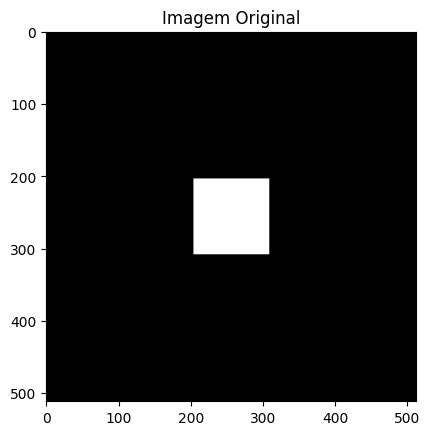

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Criando uma imagem preta de 512x512
imagem = np.zeros((512, 512), dtype=np.uint8)

# Adicionando um quadrado branco no meio da imagem
cv2.rectangle(imagem, (204, 204), (308, 308), 255, -1)

# Visualizando a imagem
plt.imshow(imagem, cmap='gray')
plt.title("Imagem Original")
plt.show()



1. b)  calcular e visualizar seu espectro de Fourier (amplitudes);

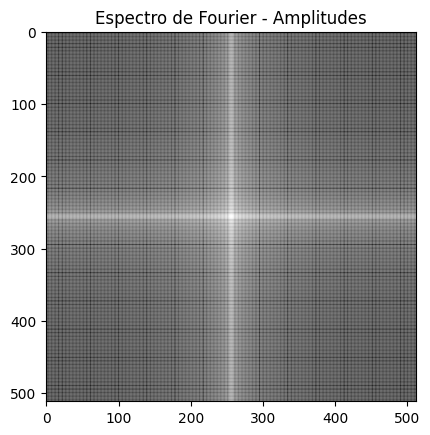

In [5]:
# Calculando a Transformada de Fourier
f = np.fft.fft2(imagem)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

# Visualização
plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Espectro de Fourier - Amplitudes')
plt.show()


1. c)  calcular e visualizar seu espectro de Fourier (fases);

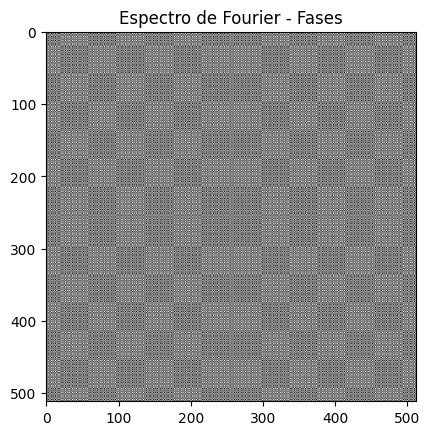

In [6]:
# Calculando as fases
fase_spectrum = np.angle(fshift)

# Visualização
plt.imshow(fase_spectrum, cmap = 'gray')
plt.title('Espectro de Fourier - Fases')
plt.show()


1. d)  obter e visualizar seu espectro de Fourier centralizado;

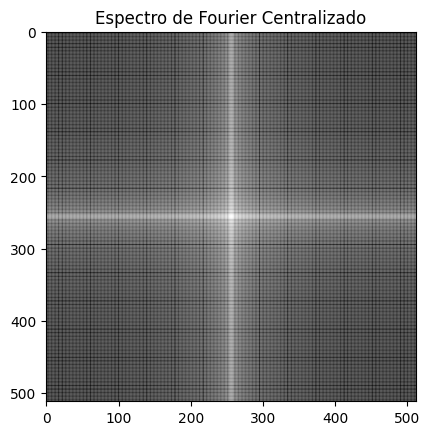

In [9]:
# Calculando a Transformada de Fourier
f = np.fft.fft2(imagem)
fshift = np.fft.fftshift(f)  # Centralizando o espectro
magnitude_spectrum_centered = 20 * np.log(np.abs(fshift) + 1)  # Adicionamos 1 para evitar log(0)

# Visualização do espectro centralizado
plt.imshow(magnitude_spectrum_centered, cmap='gray')
plt.title('Espectro de Fourier Centralizado')
plt.show()


1. e)  Aplique uma rotação de 40º no quadrado e repita os passo b-d;

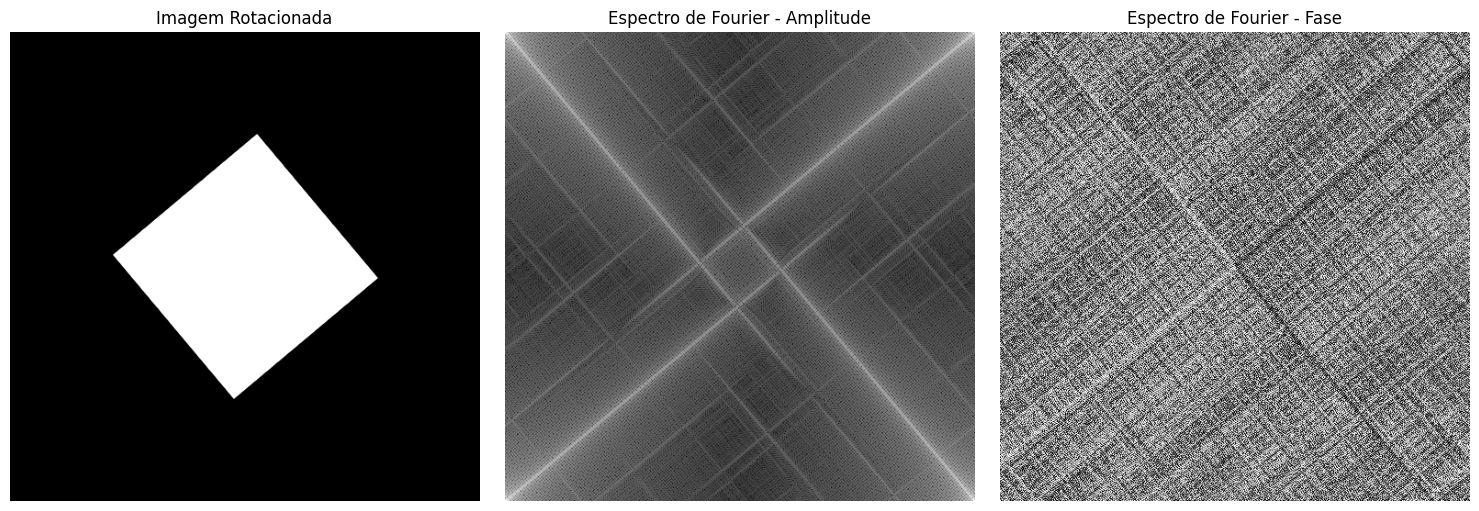

In [28]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Aplicando rotação de 40º na imagem
rows, cols = imagem.shape
M = cv2.getRotationMatrix2D((cols/2, rows/2), 40, 1)
imagem_rotacionada = cv2.warpAffine(imagem, M, (cols, rows))

# b) Calcular e visualizar o espectro de Fourier (amplitudes) da imagem rotacionada
f_rot = np.fft.fft2(imagem_rotacionada)
fshift_rot = np.fft.fftshift(f_rot)
magnitude_spectrum_rot = 20*np.log(np.abs(f_rot)+1)

# c) Calcular e visualizar o espectro de Fourier (fases) da imagem rotacionada
fase_spectrum_rot = np.angle(fshift_rot)

# Utilizando subplots para exibir as imagens lado a lado
fig, axs = plt.subplots(1, 3, figsize=(15,5))

# Imagem rotacionada
axs[0].imshow(imagem_rotacionada, cmap='gray')
axs[0].set_title('Imagem Rotacionada')
axs[0].axis('off')

# Espectro de Amplitude
axs[1].imshow(magnitude_spectrum_rot, cmap='gray')
axs[1].set_title('Espectro de Fourier - Amplitude')
axs[1].axis('off')

# Espectro de Fase
axs[2].imshow(fase_spectrum_rot, cmap='gray')
axs[2].set_title('Espectro de Fourier - Fase')
axs[2].axis('off')

plt.tight_layout()
plt.show()


1. f)  Aplique uma translação nos eixos x e y no quadrado e repita os passo b-d;

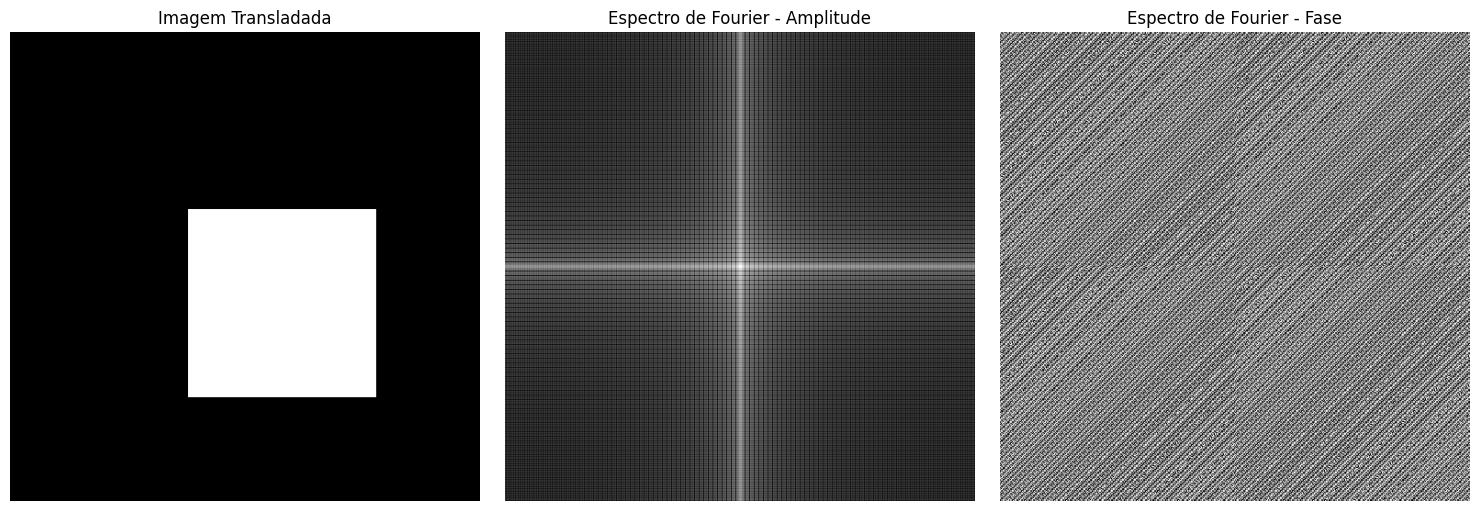

In [30]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Criação da imagem original: um quadrado branco em um fundo preto
imagem = np.zeros((512, 512), dtype=np.uint8)
cv2.rectangle(imagem, (154, 154), (358, 358), 255, -1)

# Aplicando translação de 40 pixels nos eixos x e y na imagem original
translacao = np.float32([[1, 0, 40], [0, 1, 40]])
imagem_transladada = cv2.warpAffine(imagem, translacao, (512, 512))

# b) Calculando o espectro de Fourier (amplitudes) da imagem transladada
f_trans = np.fft.fft2(imagem_transladada)
fshift_trans = np.fft.fftshift(f_trans)
magnitude_spectrum_trans = 20*np.log(np.abs(fshift_trans) + 1)  # +1 para evitar log(0)

# c) Calculando o espectro de Fourier (fases) da imagem transladada
fase_spectrum_trans = np.angle(fshift_trans)

# Usando subplots para exibir as imagens lado a lado
fig, axs = plt.subplots(1, 3, figsize=(15,5))

# Imagem transladada
axs[0].imshow(imagem_transladada, cmap='gray')
axs[0].set_title('Imagem Transladada')
axs[0].axis('off')

# Espectro de Amplitude
axs[1].imshow(magnitude_spectrum_trans, cmap='gray')
axs[1].set_title('Espectro de Fourier - Amplitude')
axs[1].axis('off')

# Espectro de Fase
axs[2].imshow(fase_spectrum_trans, cmap='gray')
axs[2].set_title('Espectro de Fourier - Fase')
axs[2].axis('off')

plt.tight_layout()
plt.show()




1. g)  Aplique um zoom na imagem e repita os passo b-d;

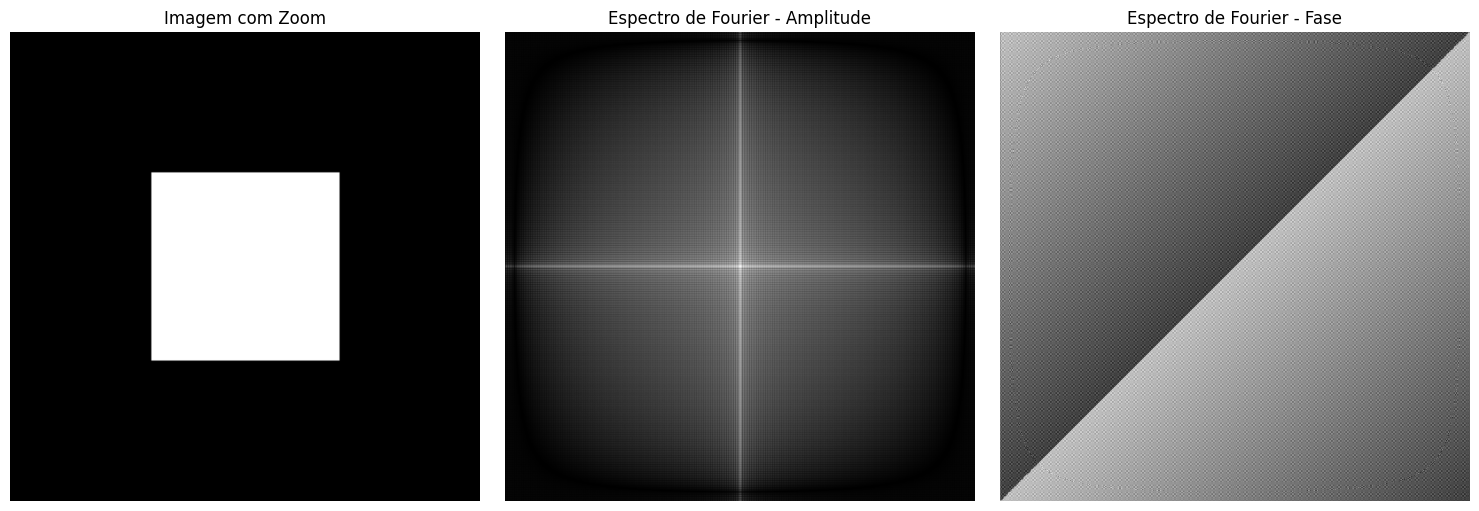

In [33]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Criação da imagem original: um quadrado branco em um fundo preto
imagem = np.zeros((512, 512), dtype=np.uint8)
cv2.rectangle(imagem, (154, 154), (358, 358), 255, -1)

# Aplicando zoom: reduzindo a imagem em 50% e depois aumentando para o tamanho original
imagem_zoom = cv2.resize(imagem, (512, 512))
imagem_zoom = cv2.resize(imagem_zoom, (1024, 1024))

# b) Calculando o espectro de Fourier (amplitudes) da imagem com zoom
f_zoom = np.fft.fft2(imagem_zoom)
fshift_zoom = np.fft.fftshift(f_zoom)
magnitude_spectrum_zoom = 20*np.log(np.abs(fshift_zoom) + 1)  # +1 para evitar log(0)

# c) Calculando o espectro de Fourier (fases) da imagem com zoom
fase_spectrum_zoom = np.angle(fshift_zoom)

# Usando subplots para exibir as imagens lado a lado
fig, axs = plt.subplots(1, 3, figsize=(15,5))

# Imagem com zoom
axs[0].imshow(imagem_zoom, cmap='gray')
axs[0].set_title('Imagem com Zoom')
axs[0].axis('off')

# Espectro de Amplitude
axs[1].imshow(magnitude_spectrum_zoom, cmap='gray')
axs[1].set_title('Espectro de Fourier - Amplitude')
axs[1].axis('off')

# Espectro de Fase
axs[2].imshow(fase_spectrum_zoom, cmap='gray')
axs[2].set_title('Espectro de Fourier - Fase')
axs[2].axis('off')

plt.tight_layout()
plt.show()


1.  h)  Explique o que acontece com a transformada de Fourier quando é aplicado a rotação, translação e zoom.

* Rotação:
Imagem no domínio espacial: Ao aplicarmos uma rotação na imagem no domínio espacial, estamos basicamente rearranjando os pixels de uma maneira rotacionada.

* **Transformada de Fourier:** No domínio da frequência, a rotação da imagem se manifesta como uma rotação correspondente do seu espectro de Fourier. Portanto, se a imagem for rotacionada por um ângulo θ, seu espectro de Fourier também será rotacionado pelo mesmo ângulo θ.

* Translação:
** Imagem no domínio espacial:**  Uma translação simplesmente move a imagem no domínio espacial sem alterar sua orientação ou forma.

    **Transformada de Fourier:**  No domínio da frequência, uma translação da imagem resulta em uma multiplicação do seu espectro de Fourier por um termo exponencial, que corresponde a um deslocamento de fase. Em termos práticos, enquanto a amplitude do espectro permanece inalterada, a fase é modificada. Esta propriedade é crucial em muitas aplicações de processamento de imagem, especialmente quando estamos interessados em analisar ou manipular características de localização de uma imagem.

* Zoom:
**Imagem no domínio espacial:**  O zoom envolve o redimensionamento da imagem, seja ampliando (zoom in) ou reduzindo (zoom out). Isso implica na reamostragem da imagem, e dependendo do método utilizado, pode envolver interpolação ou decimação dos pixels da imagem.

    **Transformada de Fourier:**  No domínio da frequência, um zoom na imagem é manifestado como uma compressão ou expansão do espectro de Fourier. Quando ampliamos uma imagem (zoom in), o espectro de Fourier é comprimido, e quando reduzimos uma imagem (zoom out), o espectro é expandido. É importante notar que, durante essa expansão ou compressão, o conteúdo de alta frequência da imagem pode ser afetado, o que pode levar a perdas de detalhes no caso de um zoom out extensivo.

    Em resumo, a Transformada de Fourier é uma ferramenta poderosa que nos permite analisar e compreender os componentes de frequência de uma imagem. As manipulações no domínio espacial, como rotação, translação e zoom, têm representações correspondentes no domínio da frequência, e entender essas relações é fundamental para o processamento eficaz de imagens e a análise de seus componentes de frequência.

### 2.     Crie filtros passa-baixa do tipo ideal, butterworth e gaussiano e aplique-o às imagens disponibilizadas. Visualize o seguinte:

Caminho das imagens

In [2]:
sinc_original_path = '/Meu Drive/Faculdade/Aula/2023.2/Processamento Digital de Imagem/Aulas/Aula 8/img/sinc_original.png'
sinc_original_menor_path = '/Meu Drive/Faculdade/Aula/2023.2/Processamento Digital de Imagem/Aulas/Aula 8/img/sinc_original_menor.tif'
sinc_rot_path = '/Meu Drive/Faculdade/Aula/2023.2/Processamento Digital de Imagem/Aulas/Aula 8/img/sinc_rot.png'
sinc_rot2_path = '/Meu Drive/Faculdade/Aula/2023.2/Processamento Digital de Imagem/Aulas/Aula 8/img/sinc_rot2.png'
sinc_trans_path = '/Meu Drive/Faculdade/Aula/2023.2/Processamento Digital de Imagem/Aulas/Aula 8/img/sinc_trans.png'

Leitura das imagens

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Ler as imagens
sinc_original = cv2.imread(sinc_original_path, cv2.IMREAD_GRAYSCALE)
sinc_original_menor = cv2.imread(sinc_original_menor_path, cv2.IMREAD_GRAYSCALE)
sinc_rot = cv2.imread(sinc_rot_path, cv2.IMREAD_GRAYSCALE)
sinc_rot2 = cv2.imread(sinc_rot2_path, cv2.IMREAD_GRAYSCALE)
sinc_trans = cv2.imread(sinc_trans_path, cv2.IMREAD_GRAYSCALE)



2.  a)  a imagem inicial;

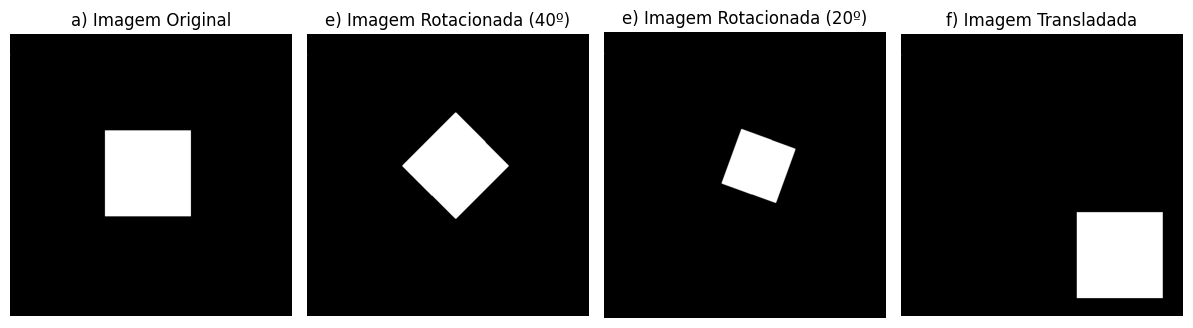

In [10]:
# Crie uma figura para organizar as imagens e legendas
plt.figure(figsize=(15, 5))

# Imagem Original
plt.subplot(151)
plt.imshow(sinc_original, cmap='gray')
plt.title('a) Imagem Original')
plt.axis('off')

# Imagem Rotacionada (40º)
plt.subplot(152)
plt.imshow(sinc_rot, cmap='gray')
plt.title('e) Imagem Rotacionada (40º)')
plt.axis('off')

# Imagem Rotacionada (20º)
plt.subplot(153)
plt.imshow(sinc_rot2, cmap='gray')
plt.title('e) Imagem Rotacionada (20º)')
plt.axis('off')

# Imagem Transladada
plt.subplot(154)
plt.imshow(sinc_trans, cmap='gray')
plt.title('f) Imagem Transladada')
plt.axis('off')

plt.tight_layout()
plt.show()

2. b)  a imagem do spectro de fourier

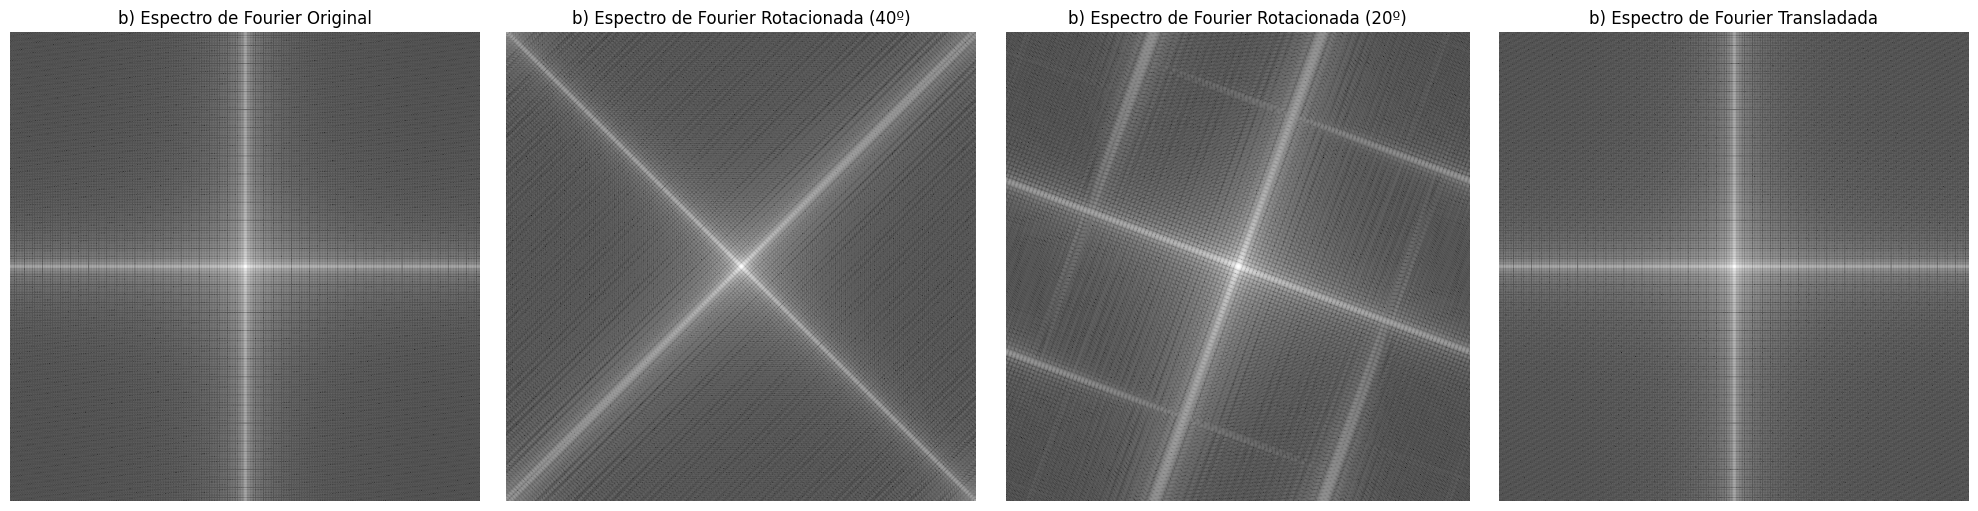

In [11]:
def fourier_spectrum(image):
    # Computa a transformada de Fourier 2D
    f = np.fft.fft2(image)
    # Centraliza as frequências baixas
    fshift = np.fft.fftshift(f)
    # Calcula a magnitude e aplica o logaritmo para melhor visualização
    magnitude_spectrum = np.log(np.abs(fshift) + 1)
    return magnitude_spectrum

# Computa o espectro de Fourier para todas as imagens
spectrum_original = fourier_spectrum(sinc_original)
spectrum_rot = fourier_spectrum(sinc_rot)
spectrum_rot2 = fourier_spectrum(sinc_rot2)
spectrum_trans = fourier_spectrum(sinc_trans)

# Organização das subplots em uma única linha com 4 colunas
plt.figure(figsize=(20, 5))  # Define o tamanho da figura para melhor visualização

# Espectro de Fourier da Imagem Original
plt.subplot(141)  
plt.imshow(spectrum_original, cmap='gray')
plt.title('b) Espectro de Fourier Original')
plt.axis('off')

# Espectro de Fourier da Imagem Rotacionada 40º
plt.subplot(142)
plt.imshow(spectrum_rot, cmap='gray')
plt.title('b) Espectro de Fourier Rotacionada (40º)')
plt.axis('off')

# Espectro de Fourier da Imagem Rotacionada 20º
plt.subplot(143)
plt.imshow(spectrum_rot2, cmap='gray')
plt.title('b) Espectro de Fourier Rotacionada (20º)')
plt.axis('off')

# Espectro de Fourier da Imagem Transladada
plt.subplot(144)
plt.imshow(spectrum_trans, cmap='gray')
plt.title('b) Espectro de Fourier Transladada')
plt.axis('off')

# Ajusta o layout e mostra a figura
plt.tight_layout()
plt.show()


2. c)  a imagem de cada filtro

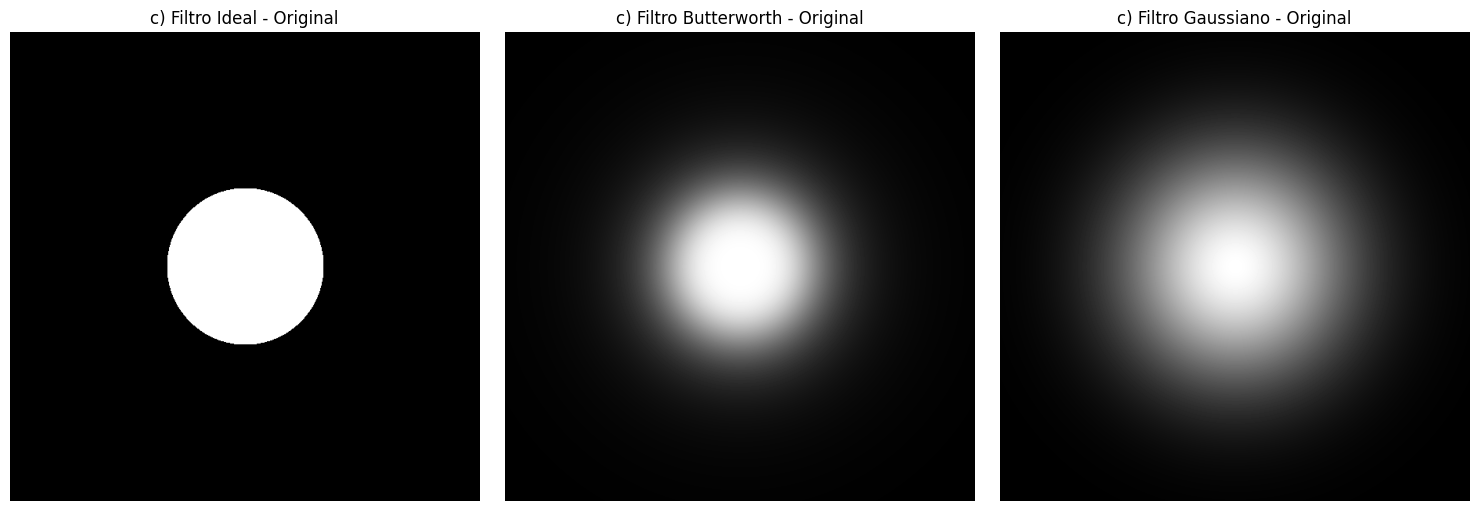

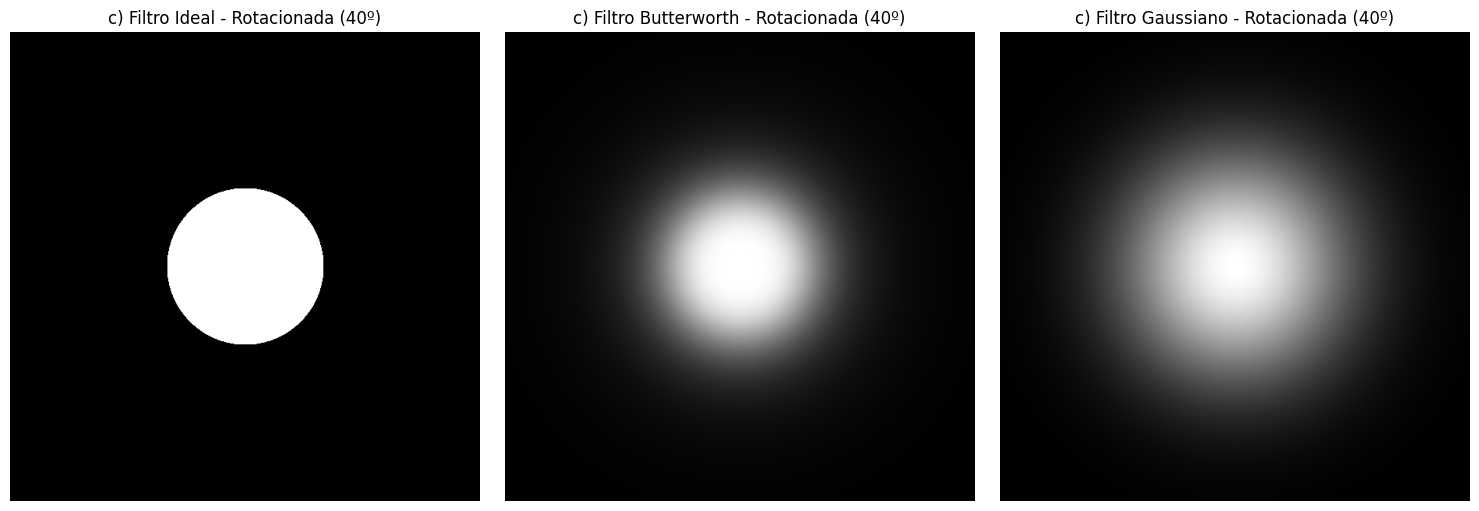

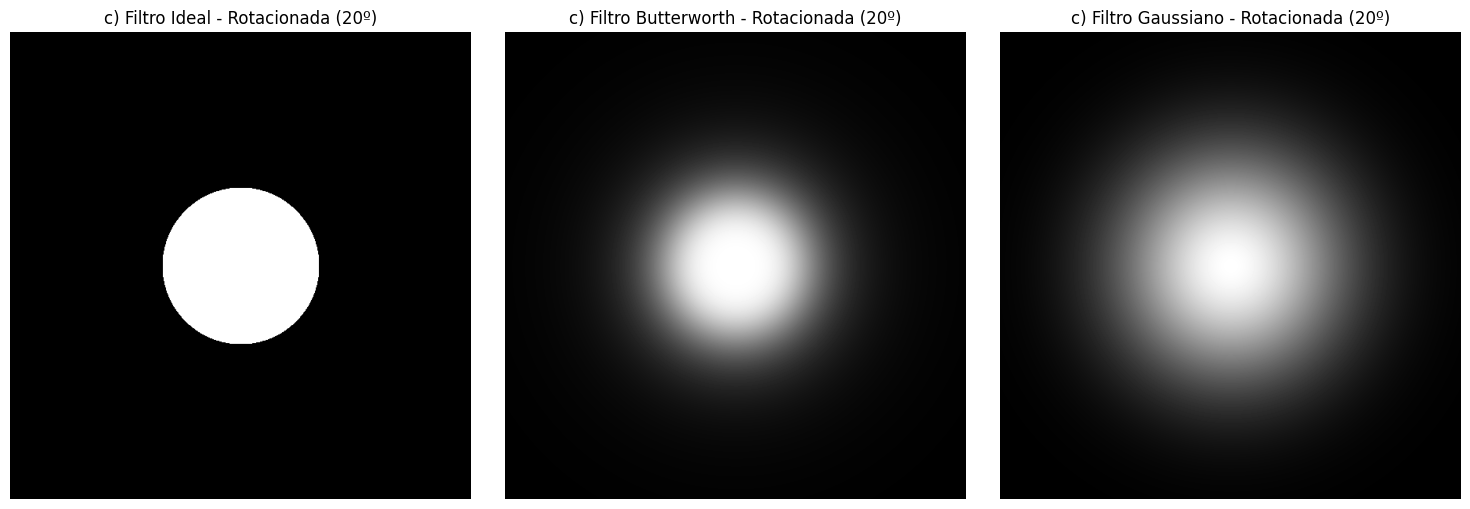

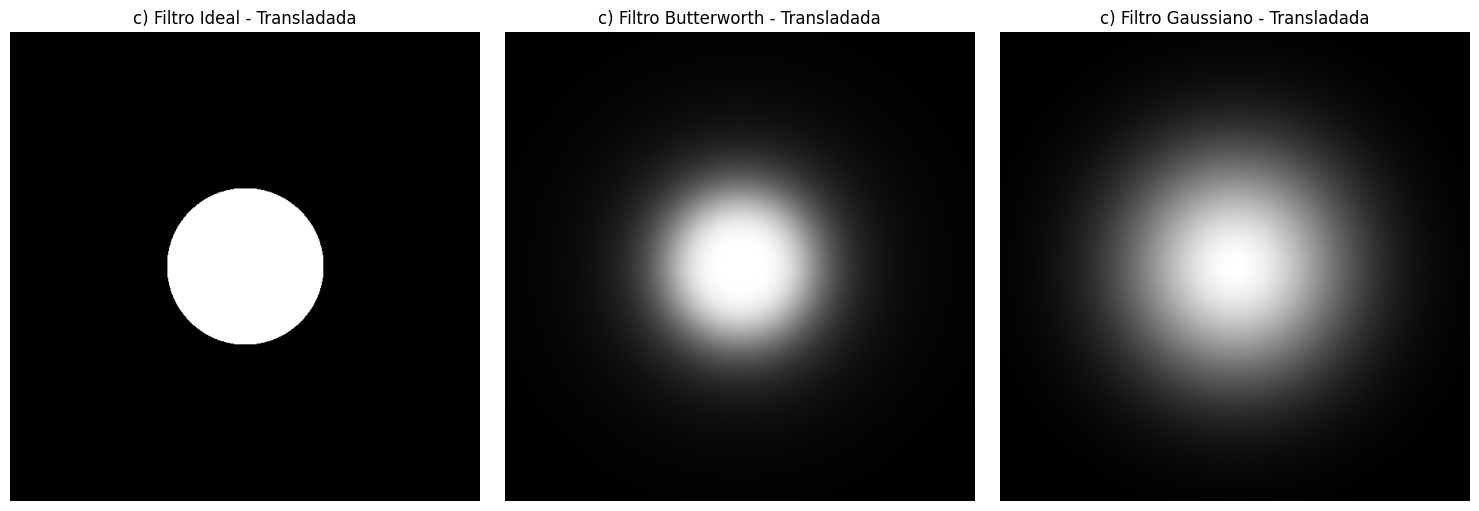

In [19]:
def create_filters(image, cutoff):
    # Filtro passa-baixa Ideal
    ideal_filter = ideal_lowpass_filter(image, cutoff)
    
    # Filtro passa-baixa Butterworth
    butter_filter = butterworth_lowpass_filter(image, cutoff)
    
    # Filtro passa-baixa Gaussiano
    gaussian_filter = gaussian_lowpass_filter(image, cutoff)
    
    return ideal_filter, butter_filter, gaussian_filter

def distance(point1, point2):
    """Retorna a distância euclidiana entre dois pontos."""
    return np.sqrt((point1[0] - point2[0]) ** 2 + (point1[1] - point2[1]) ** 2)

def ideal_lowpass_filter(image, cutoff):
    rows, cols = image.shape
    center = (rows / 2, cols / 2)
    filter = np.zeros((rows, cols))
    
    for x in range(cols):
        for y in range(rows):
            if distance((y, x), center) < cutoff:
                filter[y, x] = 1
    return filter

def butterworth_lowpass_filter(image, cutoff, order=2):
    rows, cols = image.shape
    center = (rows / 2, cols / 2)
    filter = np.zeros((rows, cols))
    
    for x in range(cols):
        for y in range(rows):
            filter[y, x] = 1 / (1 + (distance((y, x), center) / cutoff) ** (2 * order))
    return filter

def gaussian_lowpass_filter(image, cutoff):
    rows, cols = image.shape
    center = (rows / 2, cols / 2)
    filter = np.zeros((rows, cols))
    
    for x in range(cols):
        for y in range(rows):
            filter[y, x] = np.exp(-(distance((y, x), center) ** 2) / (2 * (cutoff ** 2)))
    return filter
cutoff = 30  # Você pode ajustar este valor conforme necessário

def normalize_image(image):
    """Normaliza uma imagem para o intervalo [0, 1]."""
    min_val = np.min(image)
    max_val = np.max(image)
    return (image - min_val) / (max_val - min_val)

cutoff = 100  # Ajuste conforme necessário

images = [sinc_original, sinc_rot, sinc_rot2, sinc_trans]
titles = ['Original', 'Rotacionada (40º)', 'Rotacionada (20º)', 'Transladada']

for idx, image in enumerate(images):
    # Cria os filtros
    ideal_filter, butter_filter, gaussian_filter = create_filters(image, cutoff)
    
    # Normaliza para melhor visualização
    ideal_filter = normalize_image(ideal_filter)
    butter_filter = normalize_image(butter_filter)
    gaussian_filter = normalize_image(gaussian_filter)
    
    # Exibe os filtros
    plt.figure(figsize=(15, 5))
    
    # Filtro Ideal
    plt.subplot(131)
    plt.imshow(ideal_filter, cmap='gray')
    plt.title(f'c) Filtro Ideal - {titles[idx]}')
    plt.axis('off')

    # Filtro Butterworth
    plt.subplot(132)
    plt.imshow(butter_filter, cmap='gray')
    plt.title(f'c) Filtro Butterworth - {titles[idx]}')
    plt.axis('off')

    # Filtro Gaussiano
    plt.subplot(133)
    plt.imshow(gaussian_filter, cmap='gray')
    plt.title(f'c) Filtro Gaussiano - {titles[idx]}')
    plt.axis('off')

    # Ajusta o layout e mostra a figura
    plt.tight_layout()
    plt.show()



2. d)  a imagem resultante após aplicação de cada filtro

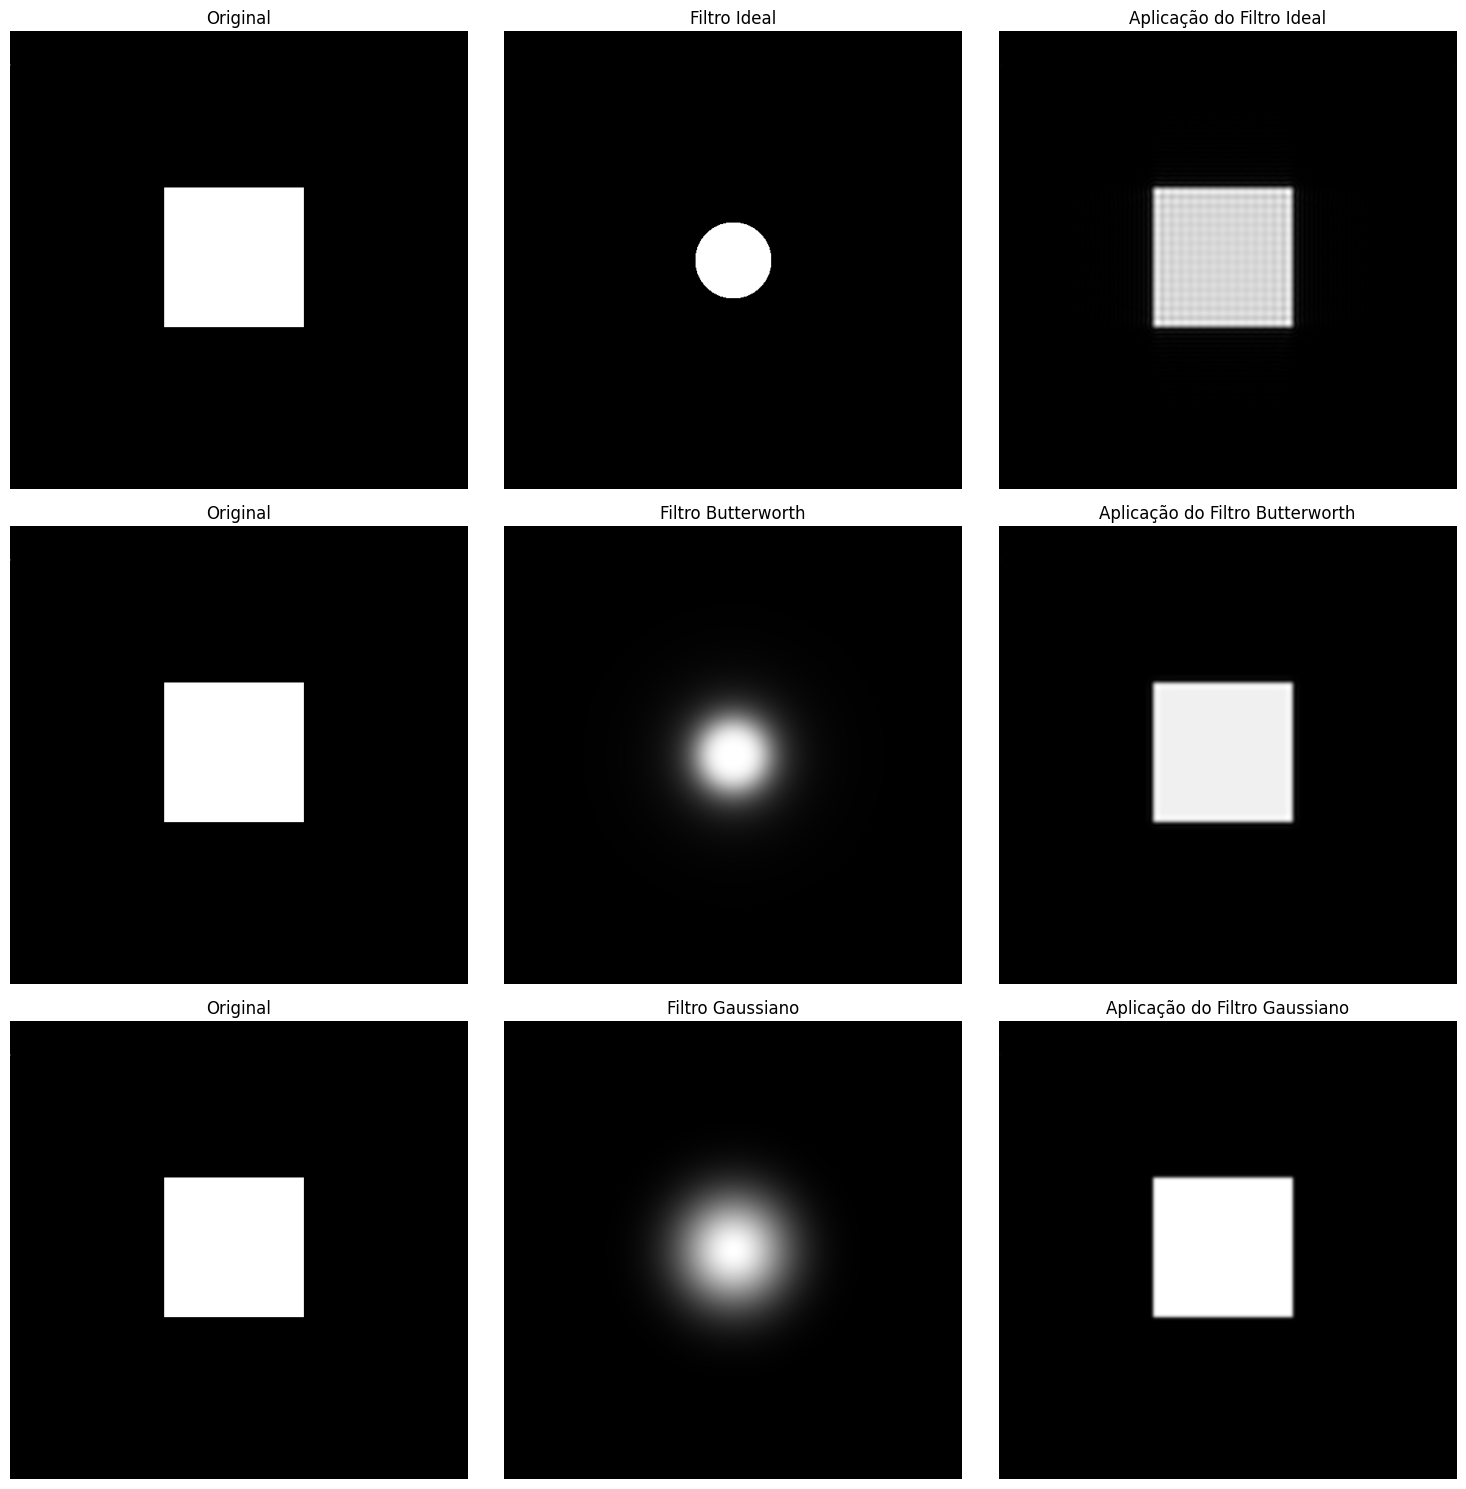

In [22]:
def apply_filter(image, filter):
    f = np.fft.fft2(image)
    fshift = np.fft.fftshift(f)
    fshift = fshift * filter
    f_ishift = np.fft.ifftshift(fshift)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)
    return img_back

# Define um cutoff para os filtros
cutoff = 50

# Cria os filtros
ideal_filter = ideal_lowpass_filter(sinc_original, cutoff)
butter_filter = butterworth_lowpass_filter(sinc_original, cutoff)
gaussian_filter = gaussian_lowpass_filter(sinc_original, cutoff)

# Aplica os filtros
img_ideal = apply_filter(sinc_original, ideal_filter)
img_butter = apply_filter(sinc_original, butter_filter)
img_gaussian = apply_filter(sinc_original, gaussian_filter)

# Visualização
fig, axs = plt.subplots(3, 3, figsize=(15,15))

# Imagens originais
axs[0, 0].imshow(sinc_original, cmap='gray')
axs[0, 0].set_title('Original')
axs[0, 1].imshow(ideal_filter, cmap='gray')
axs[0, 1].set_title('Filtro Ideal')
axs[0, 2].imshow(img_ideal, cmap='gray')
axs[0, 2].set_title('Aplicação do Filtro Ideal')

axs[1, 0].imshow(sinc_original, cmap='gray')
axs[1, 0].set_title('Original')
axs[1, 1].imshow(butter_filter, cmap='gray')
axs[1, 1].set_title('Filtro Butterworth')
axs[1, 2].imshow(img_butter, cmap='gray')
axs[1, 2].set_title('Aplicação do Filtro Butterworth')

axs[2, 0].imshow(sinc_original, cmap='gray')
axs[2, 0].set_title('Original')
axs[2, 1].imshow(gaussian_filter, cmap='gray')
axs[2, 1].set_title('Filtro Gaussiano')
axs[2, 2].imshow(img_gaussian, cmap='gray')
axs[2, 2].set_title('Aplicação do Filtro Gaussiano')

for ax in axs.ravel():
    ax.axis('off')

plt.tight_layout()
plt.show()


### 3.     Crie um filtro passa-alta do tipo ideal, butterworth e gaussiano e aplique-o às imagens disponibilizadas. Visualize os mesmos dados da tarefa anterior:

    a)  a imagem inicial;

    b)  a imagem do spectro de fourier;

    c)  a imagem de cada filtro;

    d)  a imagem resultante após aplicação de cada filtro.

Importando Bibliotecas

In [23]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

Funções de filtro passa-alta

In [24]:
def ideal_highpass_filter(image, cutoff):
    return 1 - ideal_lowpass_filter(image, cutoff)

def butterworth_highpass_filter(image, cutoff, order=2):
    return 1 - butterworth_lowpass_filter(image, cutoff, order)

def gaussian_highpass_filter(image, cutoff):
    return 1 - gaussian_lowpass_filter(image, cutoff)

# Função para aplicar o filtro usando transformada de Fourier
def apply_filter(image, filter):
    f = np.fft.fft2(image)
    fshift = np.fft.fftshift(f)
    fshift = fshift * filter
    f_ishift = np.fft.ifftshift(fshift)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)
    return img_back

Criação e visualização dos filtros e resultados

In [25]:
images = [sinc_original, sinc_rot, sinc_rot2, sinc_trans]
titles = ['Original', 'Rotacionada (40º)', 'Rotacionada (20º)', 'Transladada']

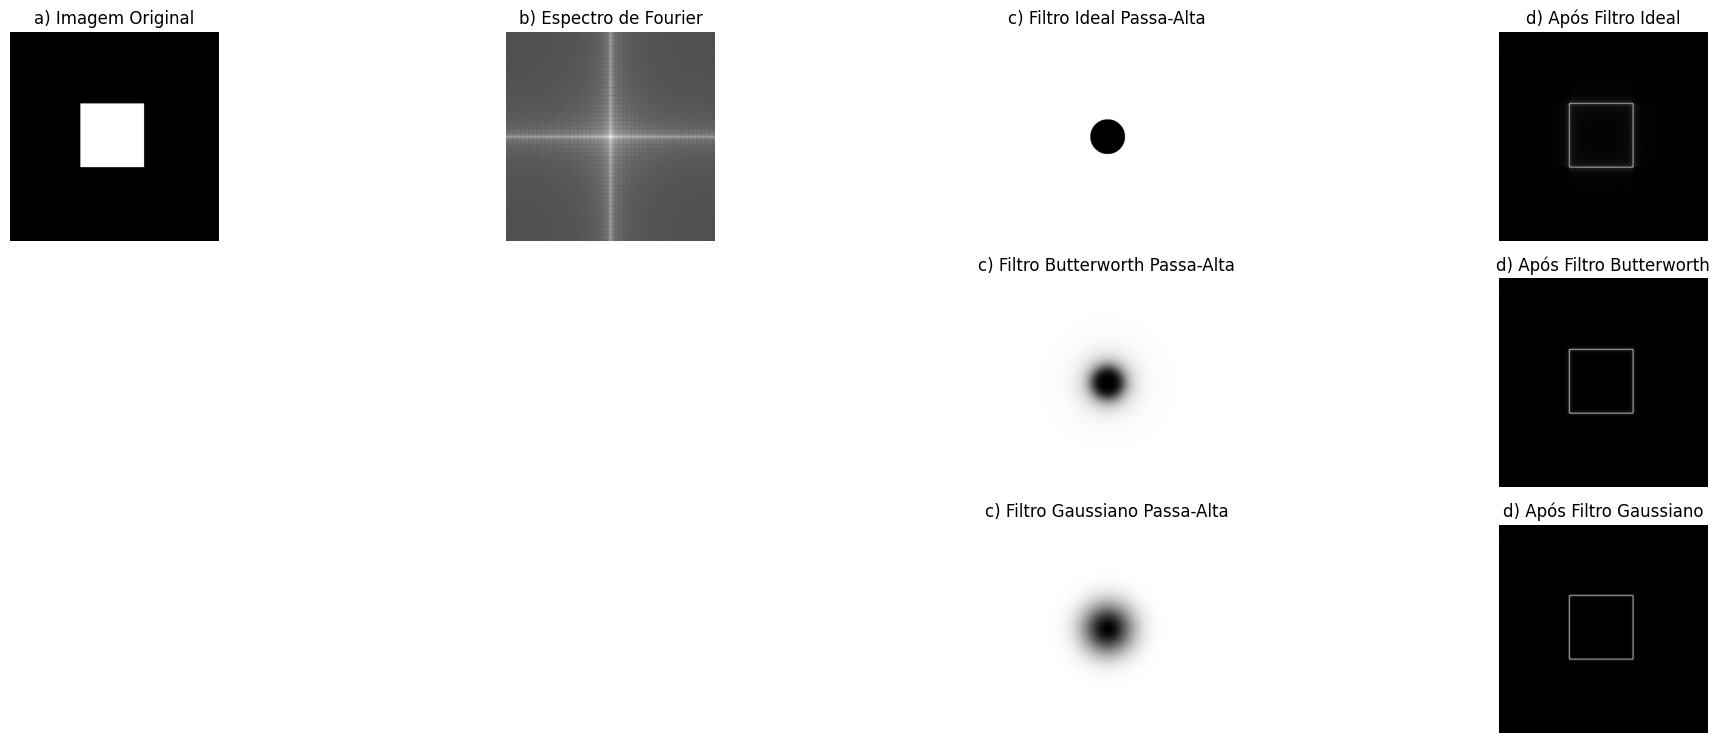

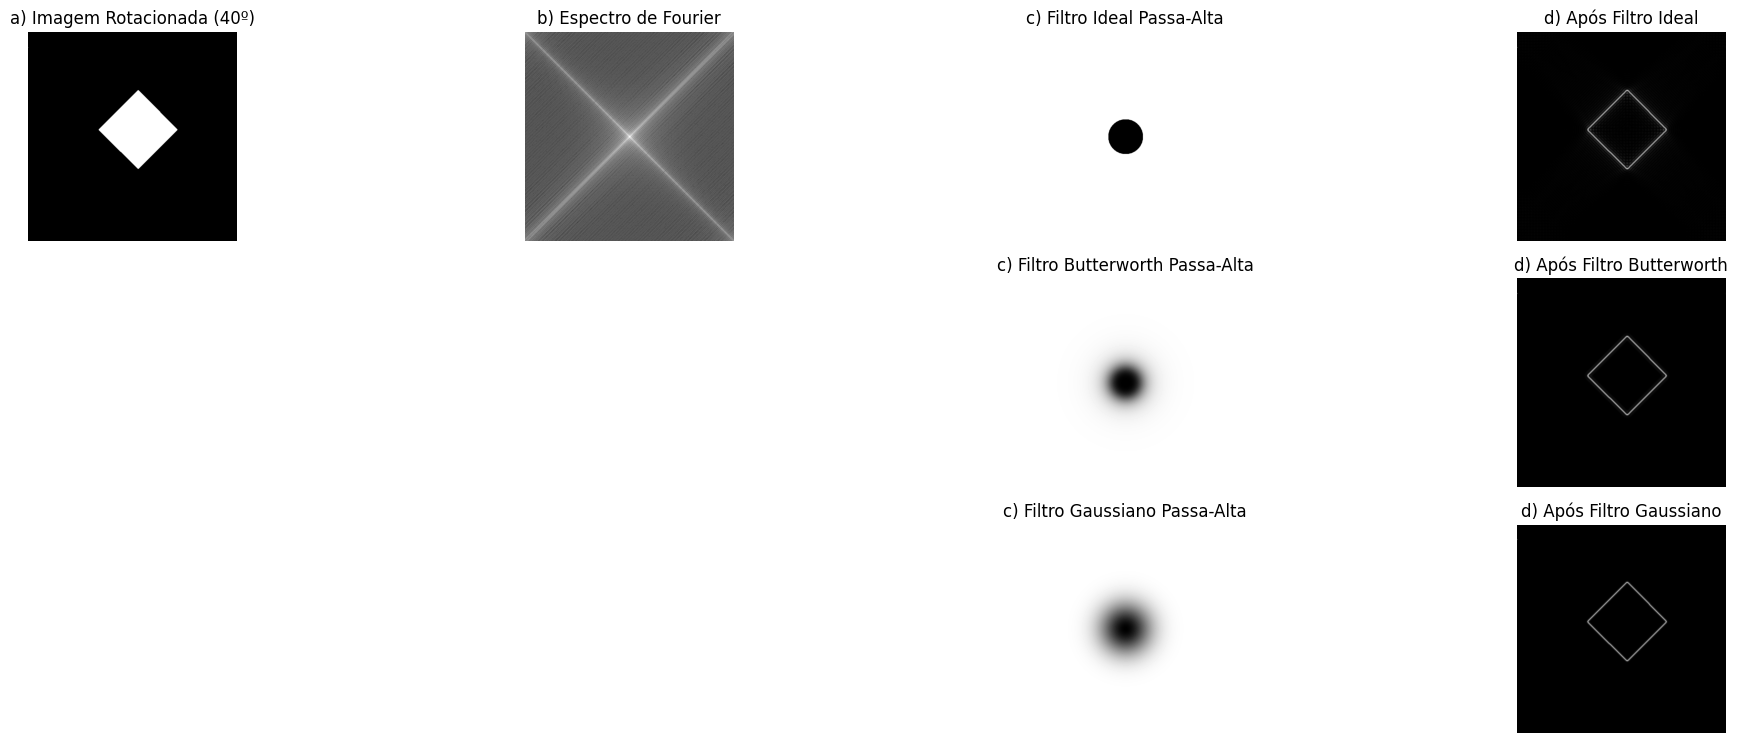

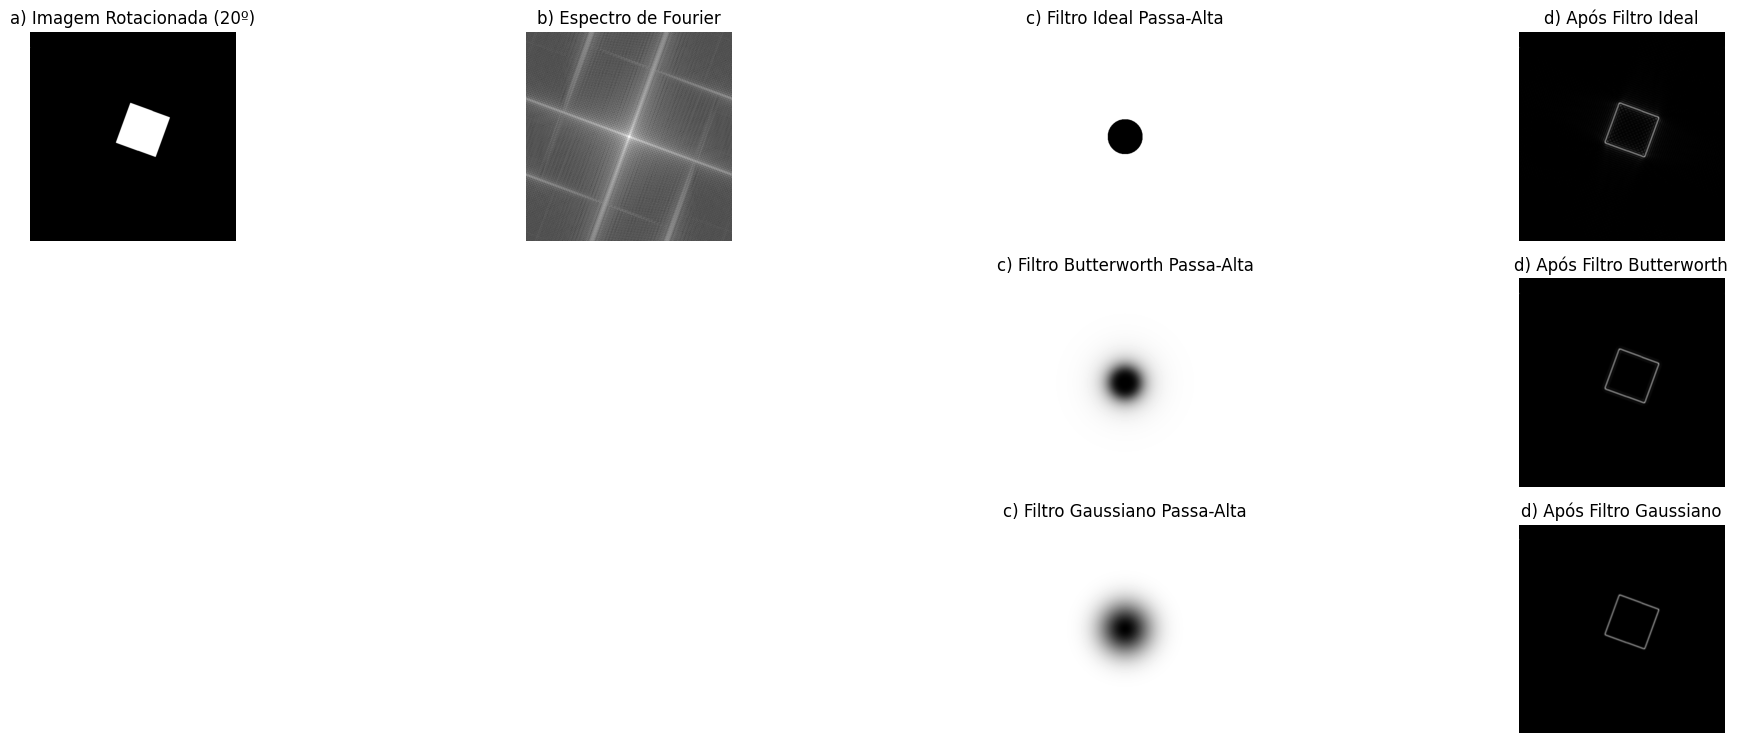

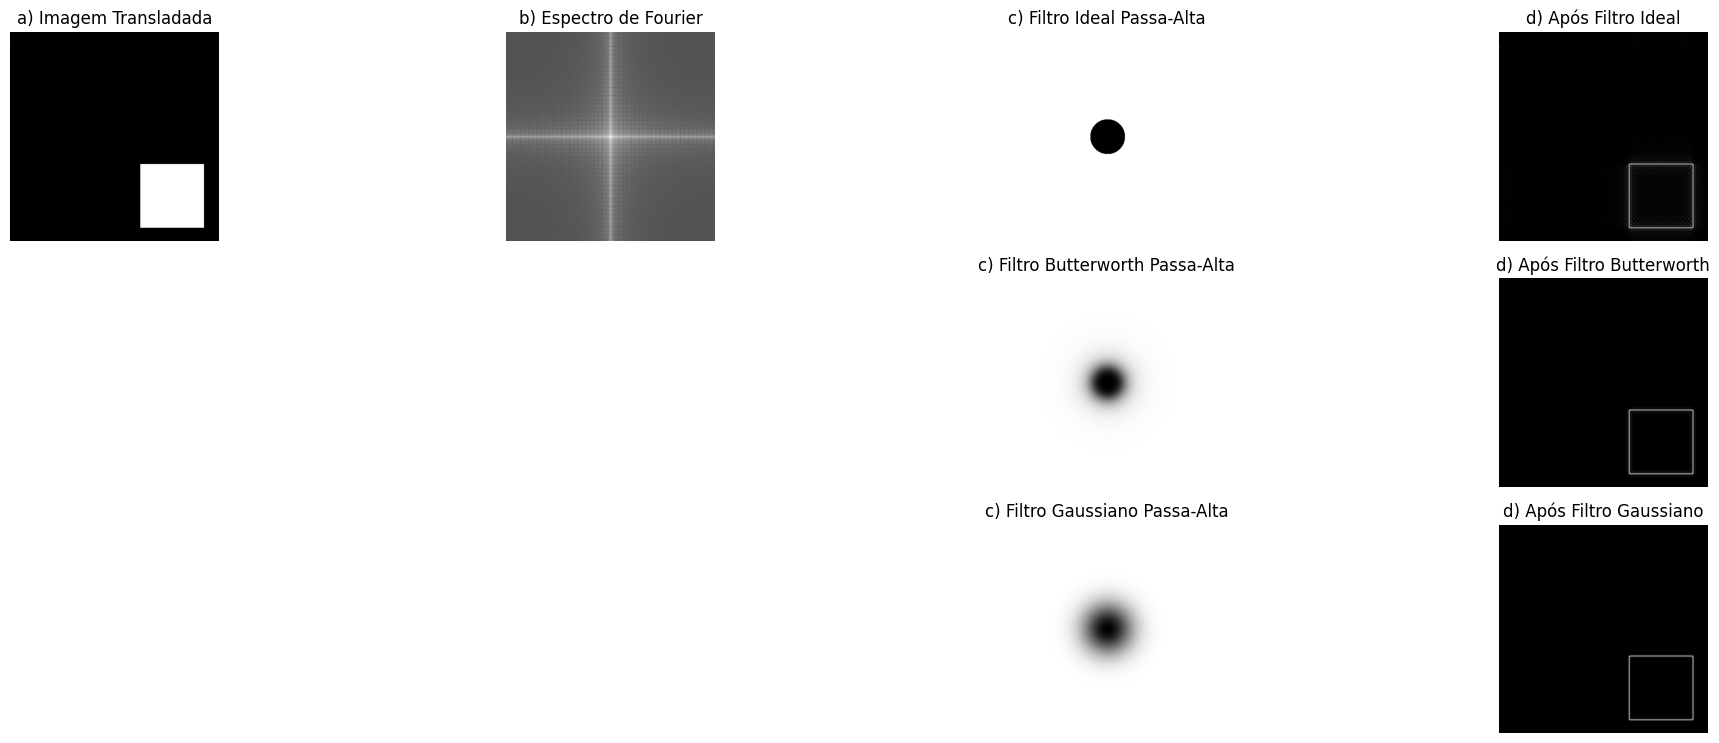

In [26]:
for idx, image in enumerate(images):
    # Fourier
    spectrum = fourier_spectrum(image)
    
    # Criação dos filtros
    ideal_hp = ideal_highpass_filter(image, cutoff)
    butter_hp = butterworth_highpass_filter(image, cutoff)
    gaussian_hp = gaussian_highpass_filter(image, cutoff)

    # Aplicação dos filtros
    result_ideal = apply_filter(image, ideal_hp)
    result_butter = apply_filter(image, butter_hp)
    result_gaussian = apply_filter(image, gaussian_hp)
    
    # Exibição
    plt.figure(figsize=(20, 10))

    # Imagem original
    plt.subplot(4, 4, 1)
    plt.imshow(image, cmap='gray')
    plt.title(f'a) Imagem {titles[idx]}')
    plt.axis('off')

    # Espectro de Fourier
    plt.subplot(4, 4, 2)
    plt.imshow(spectrum, cmap='gray')
    plt.title('b) Espectro de Fourier')
    plt.axis('off')

    # Filtro passa-alta Ideal
    plt.subplot(4, 4, 3)
    plt.imshow(ideal_hp, cmap='gray')
    plt.title('c) Filtro Ideal Passa-Alta')
    plt.axis('off')
    
    # Resultado filtro Ideal
    plt.subplot(4, 4, 4)
    plt.imshow(result_ideal, cmap='gray')
    plt.title('d) Após Filtro Ideal')
    plt.axis('off')

    # Filtro passa-alta Butterworth
    plt.subplot(4, 4, 7)
    plt.imshow(butter_hp, cmap='gray')
    plt.title('c) Filtro Butterworth Passa-Alta')
    plt.axis('off')
    
    # Resultado filtro Butterworth
    plt.subplot(4, 4, 8)
    plt.imshow(result_butter, cmap='gray')
    plt.title('d) Após Filtro Butterworth')
    plt.axis('off')

    # Filtro passa-alta Gaussiano
    plt.subplot(4, 4, 11)
    plt.imshow(gaussian_hp, cmap='gray')
    plt.title('c) Filtro Gaussiano Passa-Alta')
    plt.axis('off')
    
    # Resultado filtro Gaussiano
    plt.subplot(4, 4, 12)
    plt.imshow(result_gaussian, cmap='gray')
    plt.title('d) Após Filtro Gaussiano')
    plt.axis('off')

    # Ajusta o layout e mostra a figura
    plt.tight_layout()
    plt.show()

### 4.     Varie o parâmetro de frequência de corte no filtro passa-baixa criado na tarefa 2. Por exemplo, tome valores de D0 iguais a 0,01, 0,05, 0,5. A imagem inicial é igual à anterior. Visualize as imagens dos filtros e as imagens resultantes. Explique os resultados.

Utilizaremos os valores propostos:

D0 = 0,01
D0 = 0,05
D0 = 0,5

Iremos:

Aplicar os filtros passa-baixa ideal, Butterworth e Gaussiano em cada imagem para cada valor de f0.
Visualizar as imagens dos filtros e as imagens resultantes.

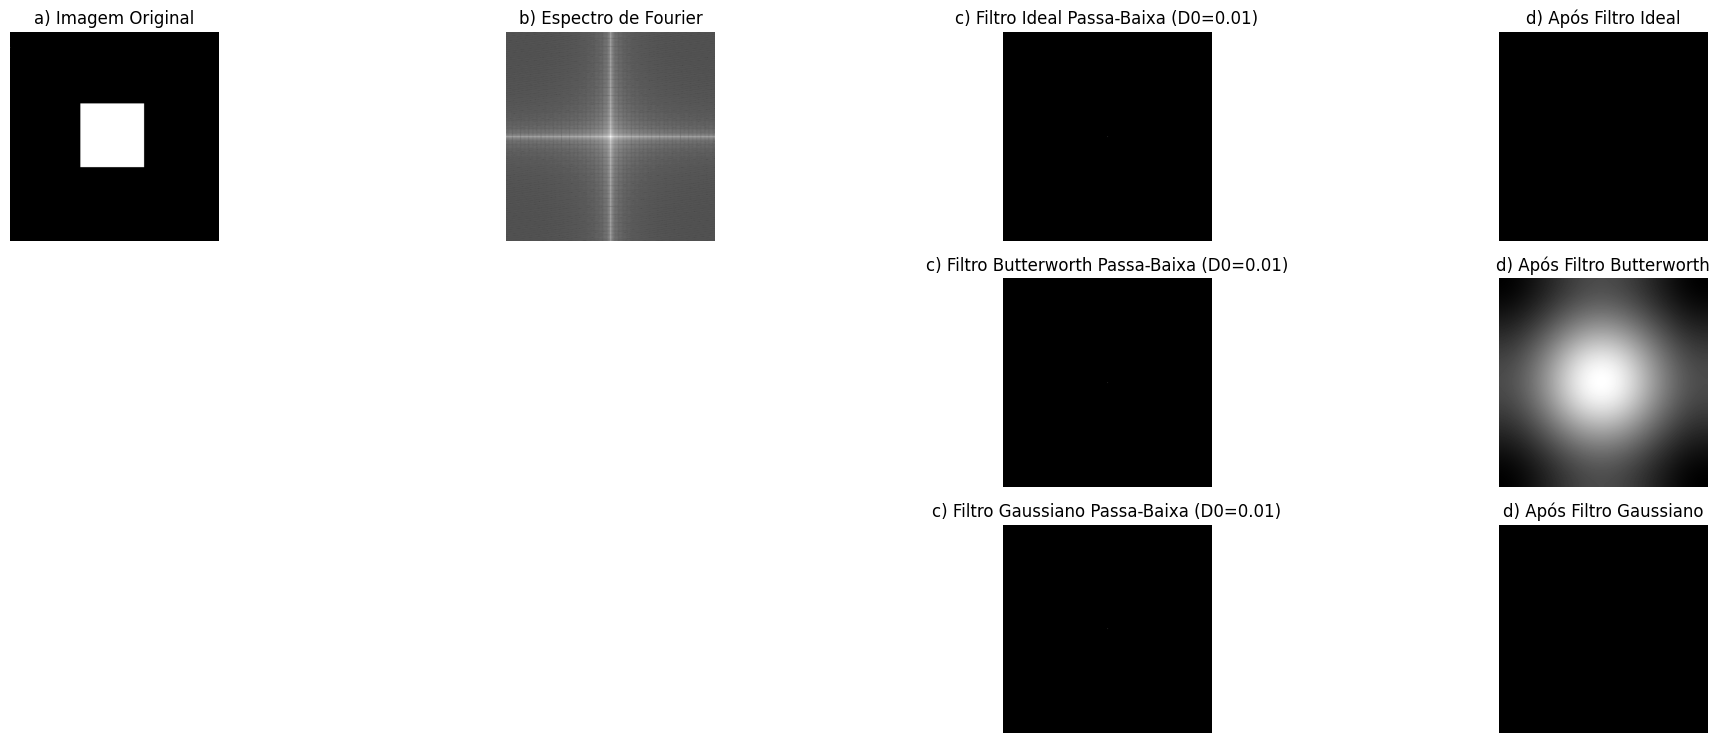

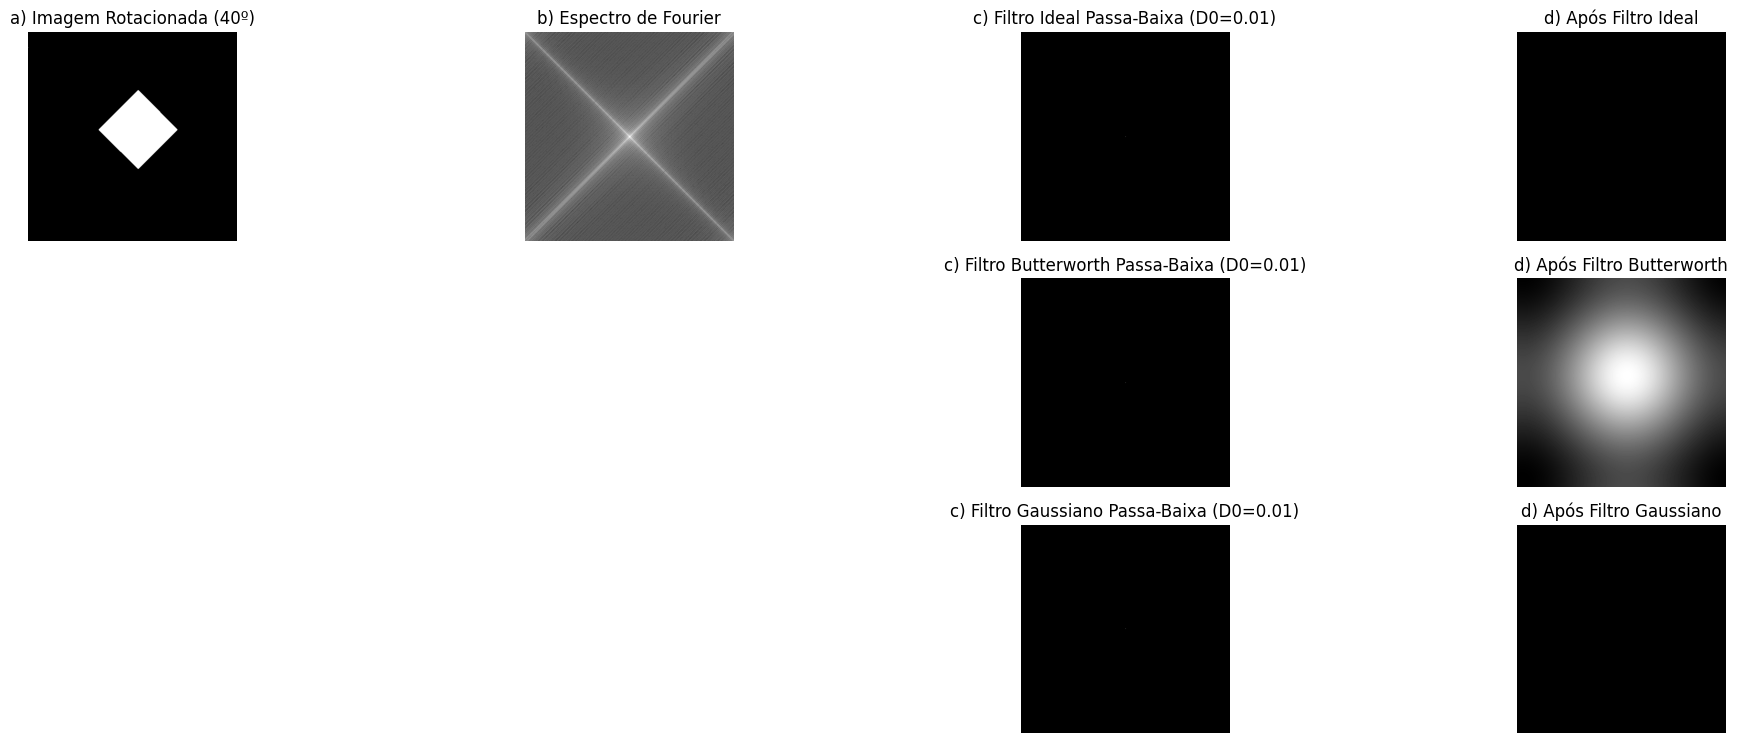

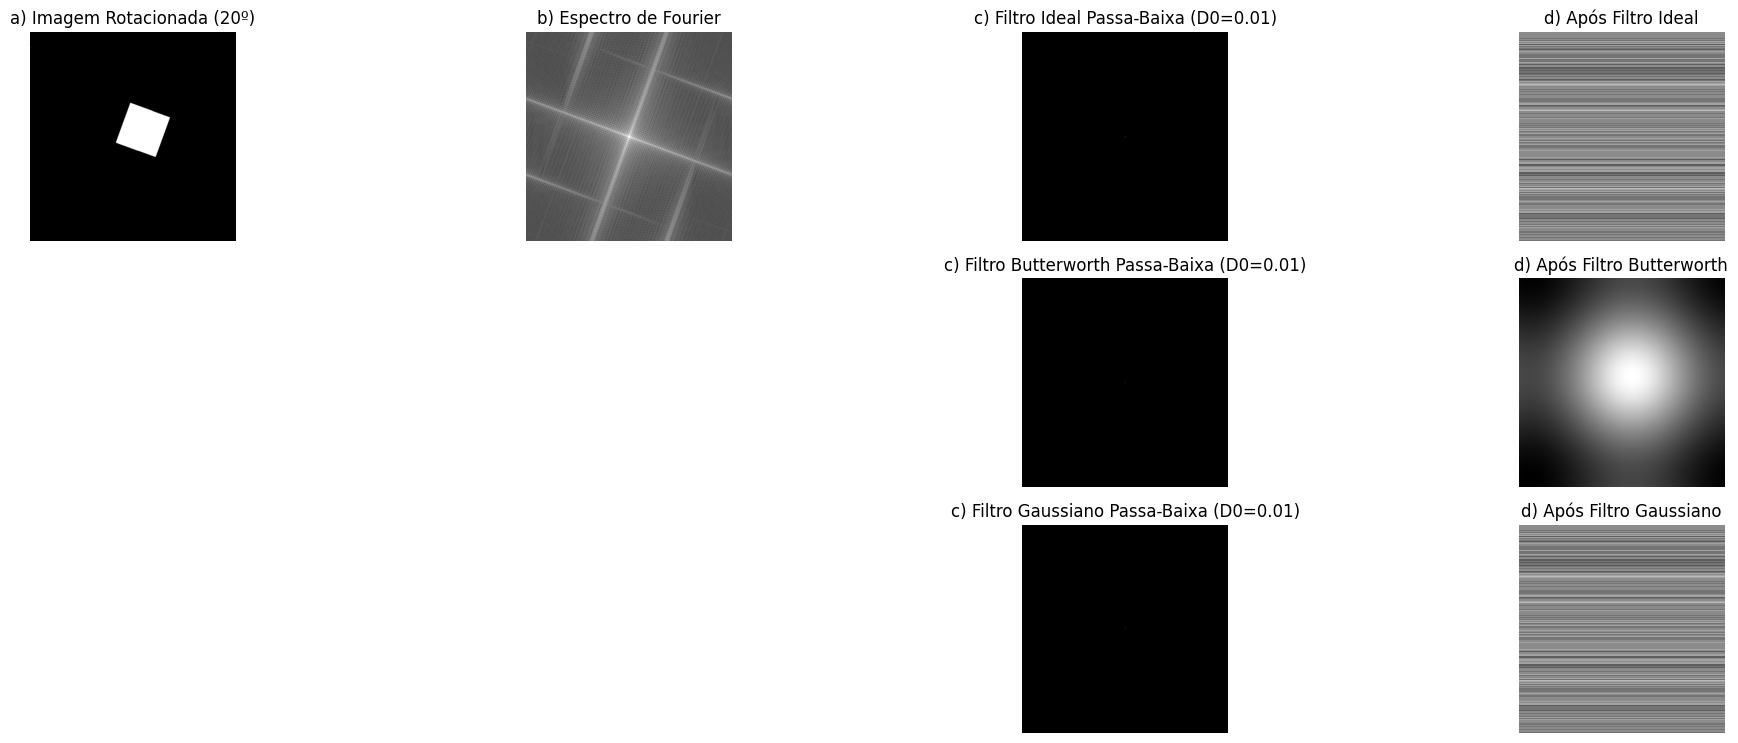

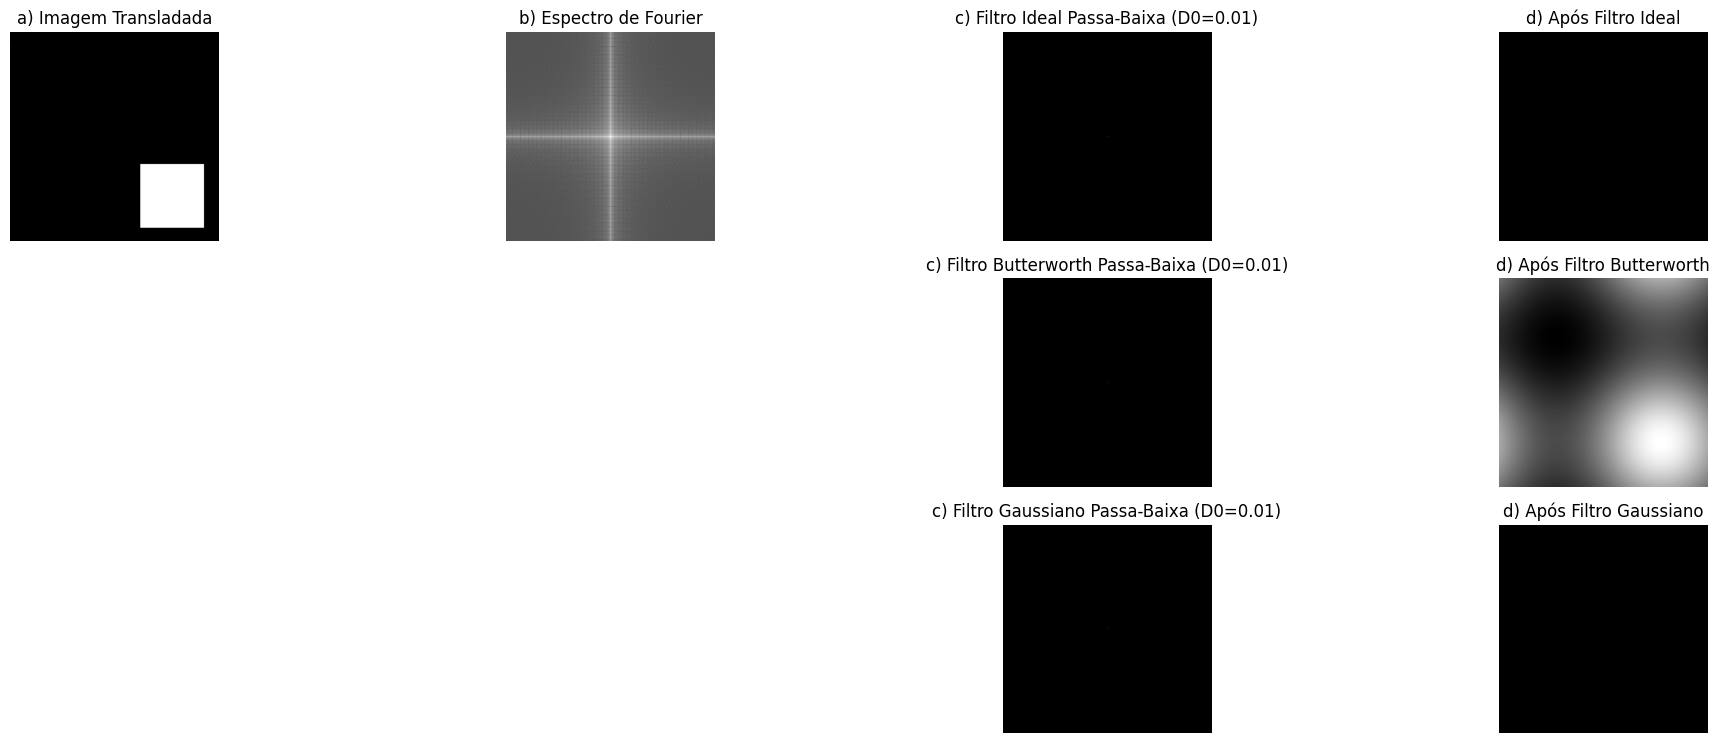

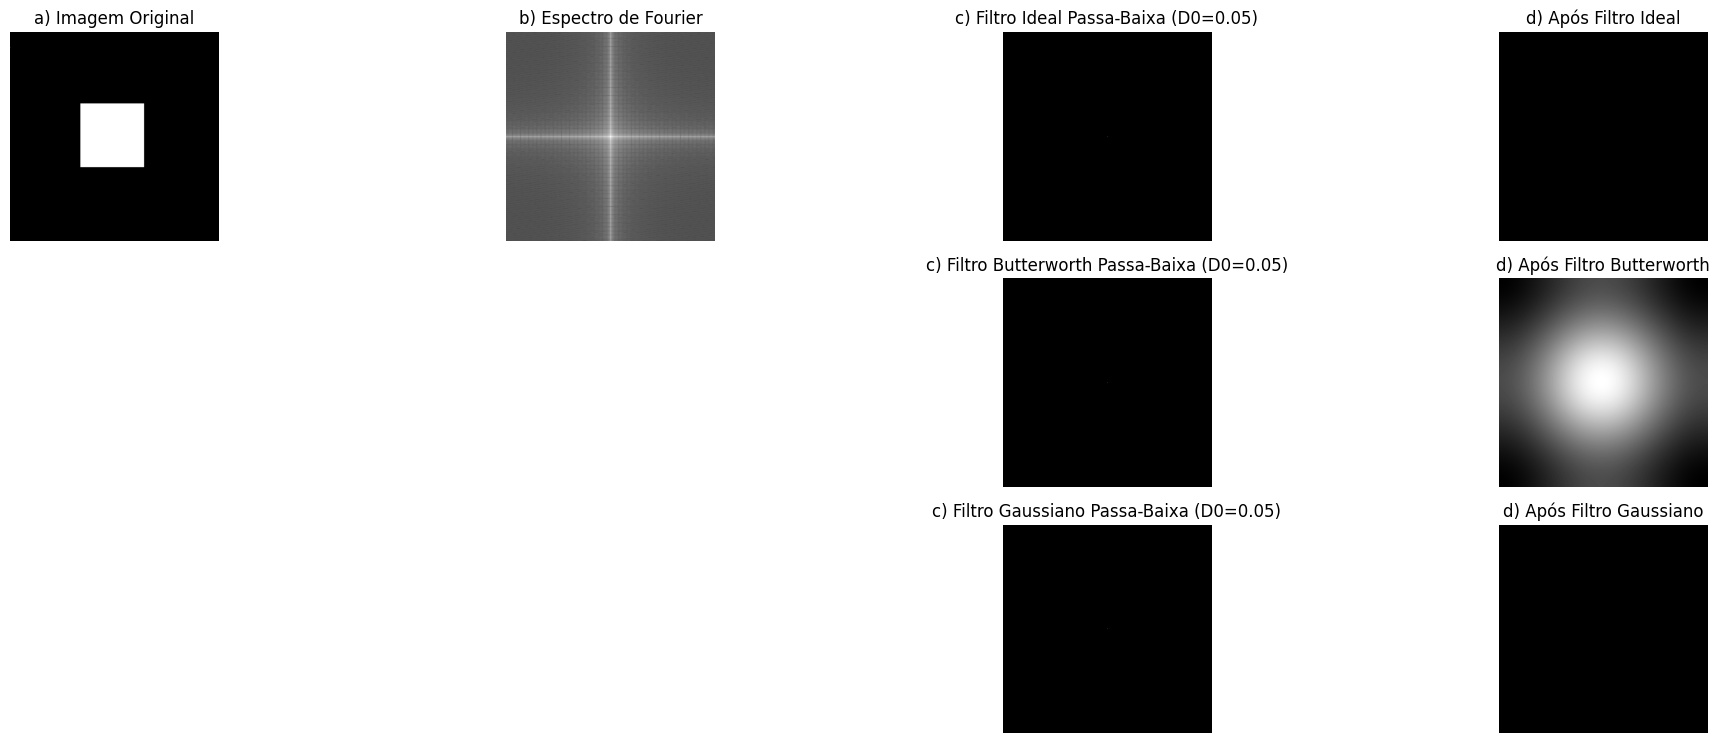

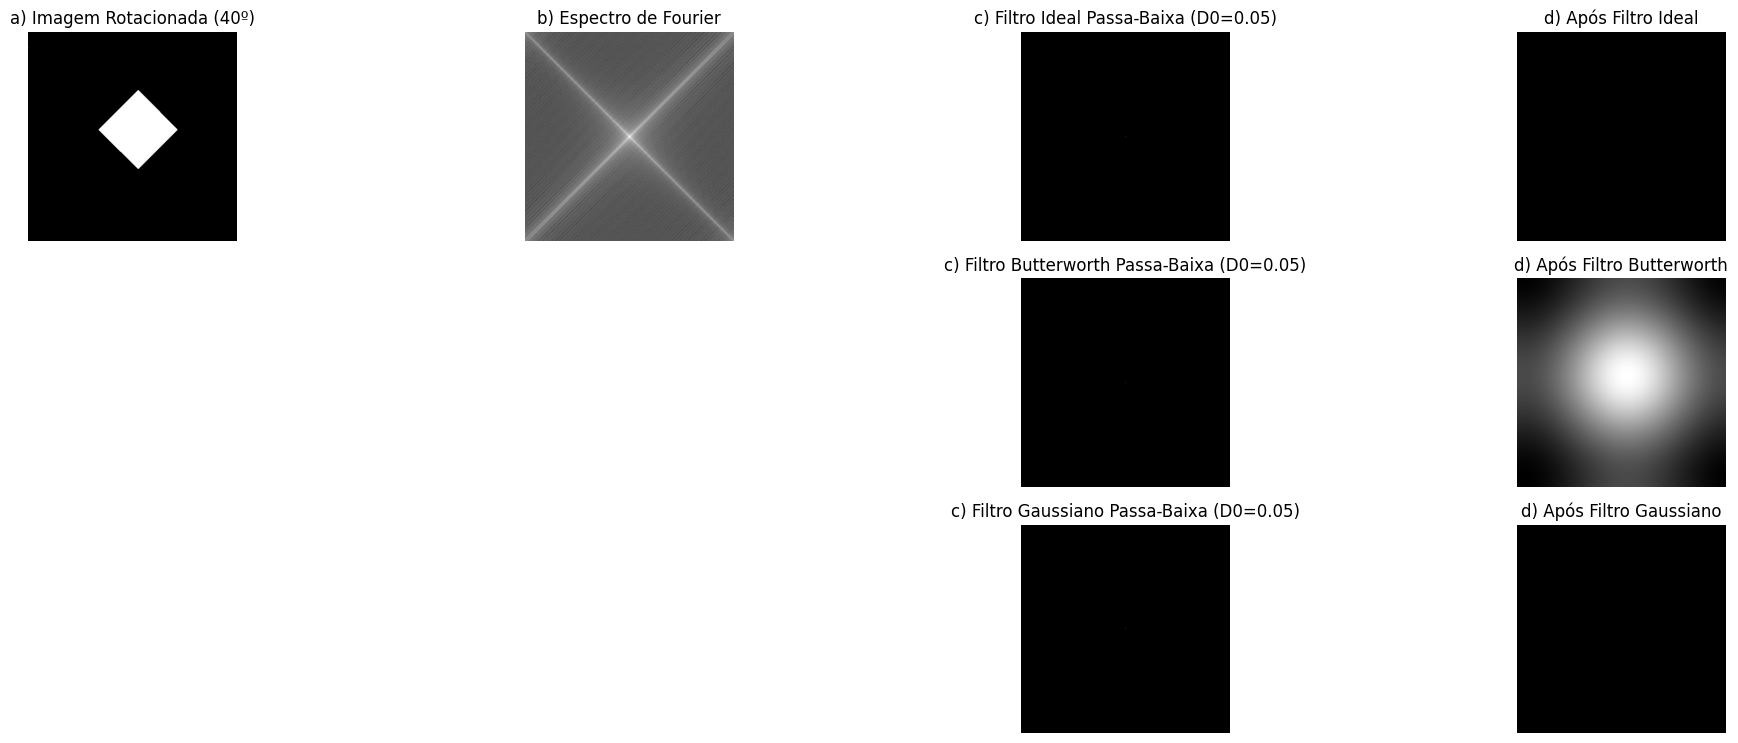

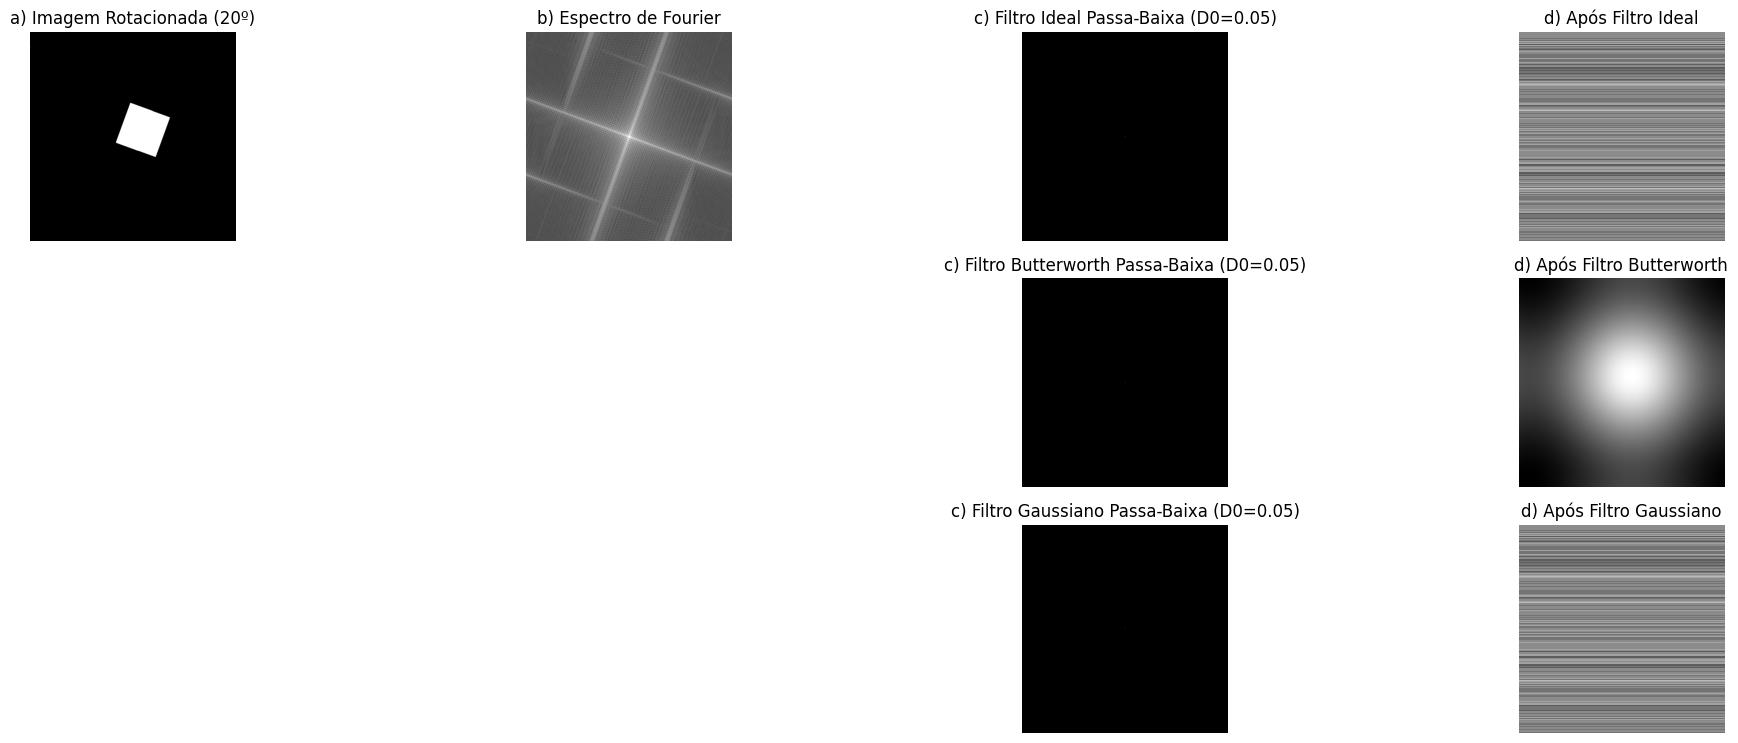

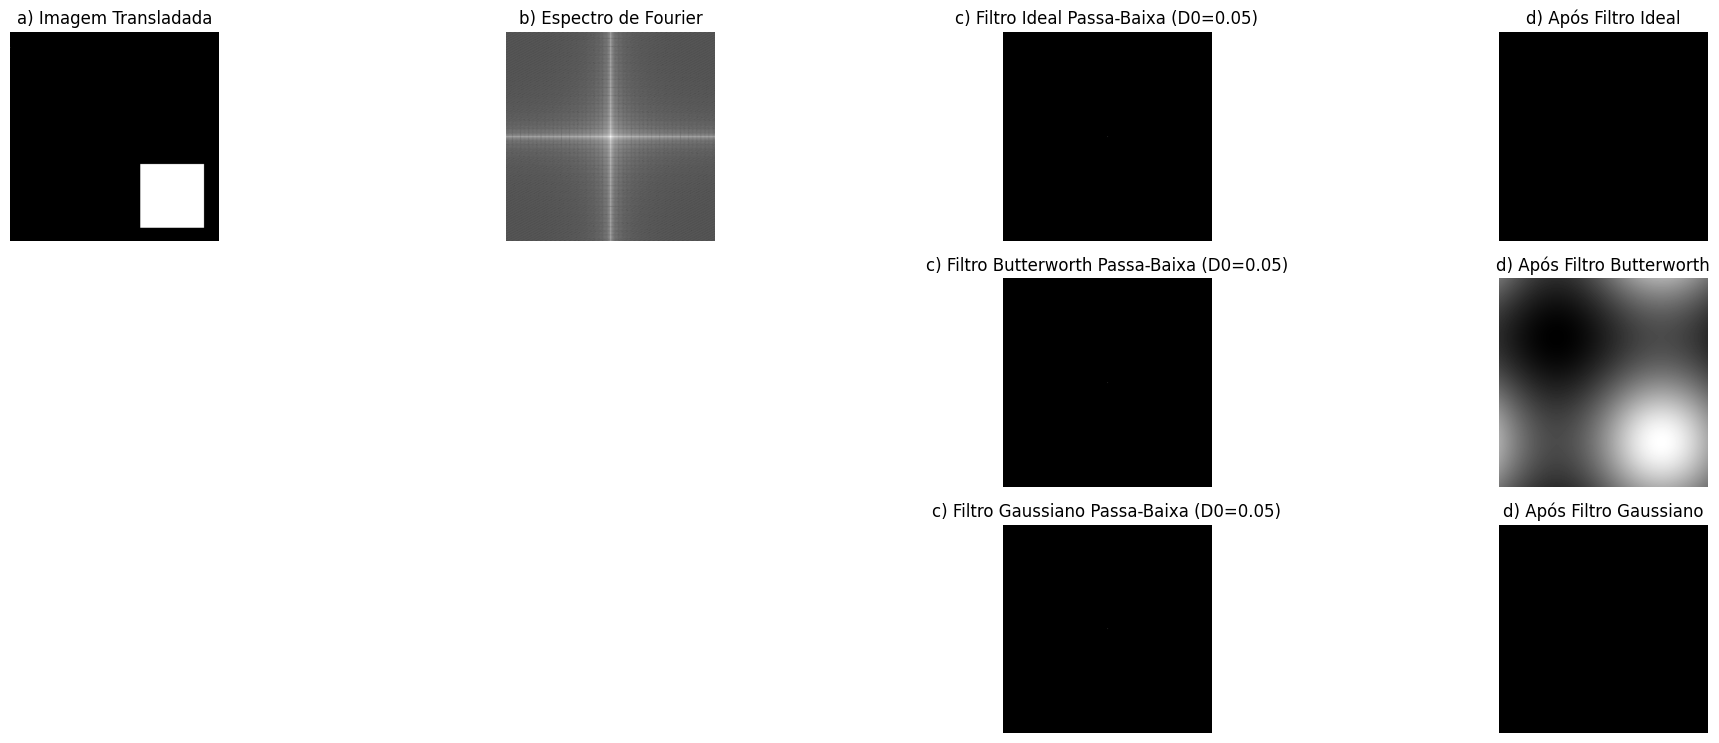

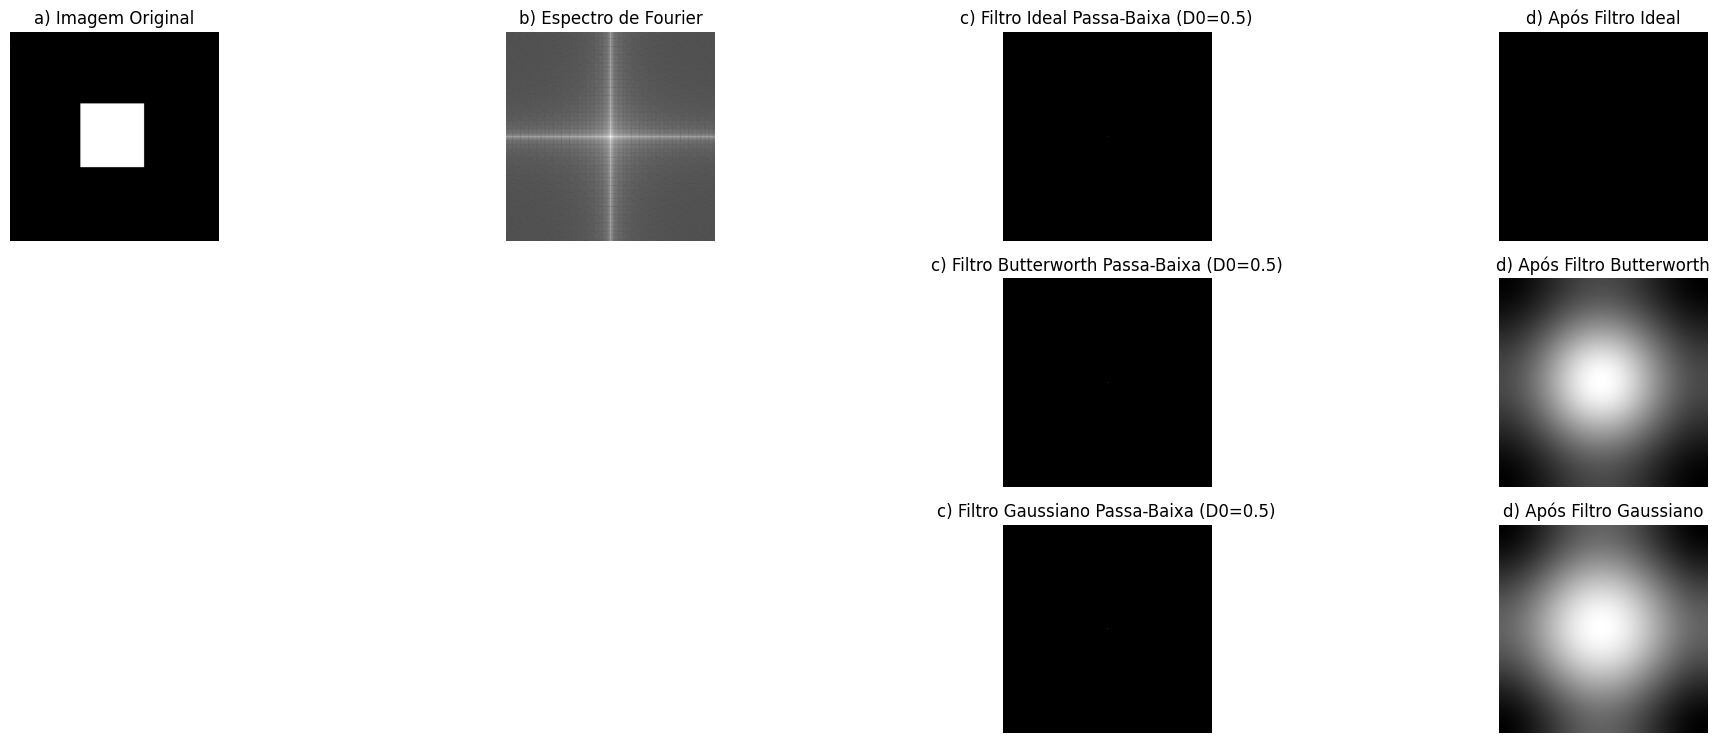

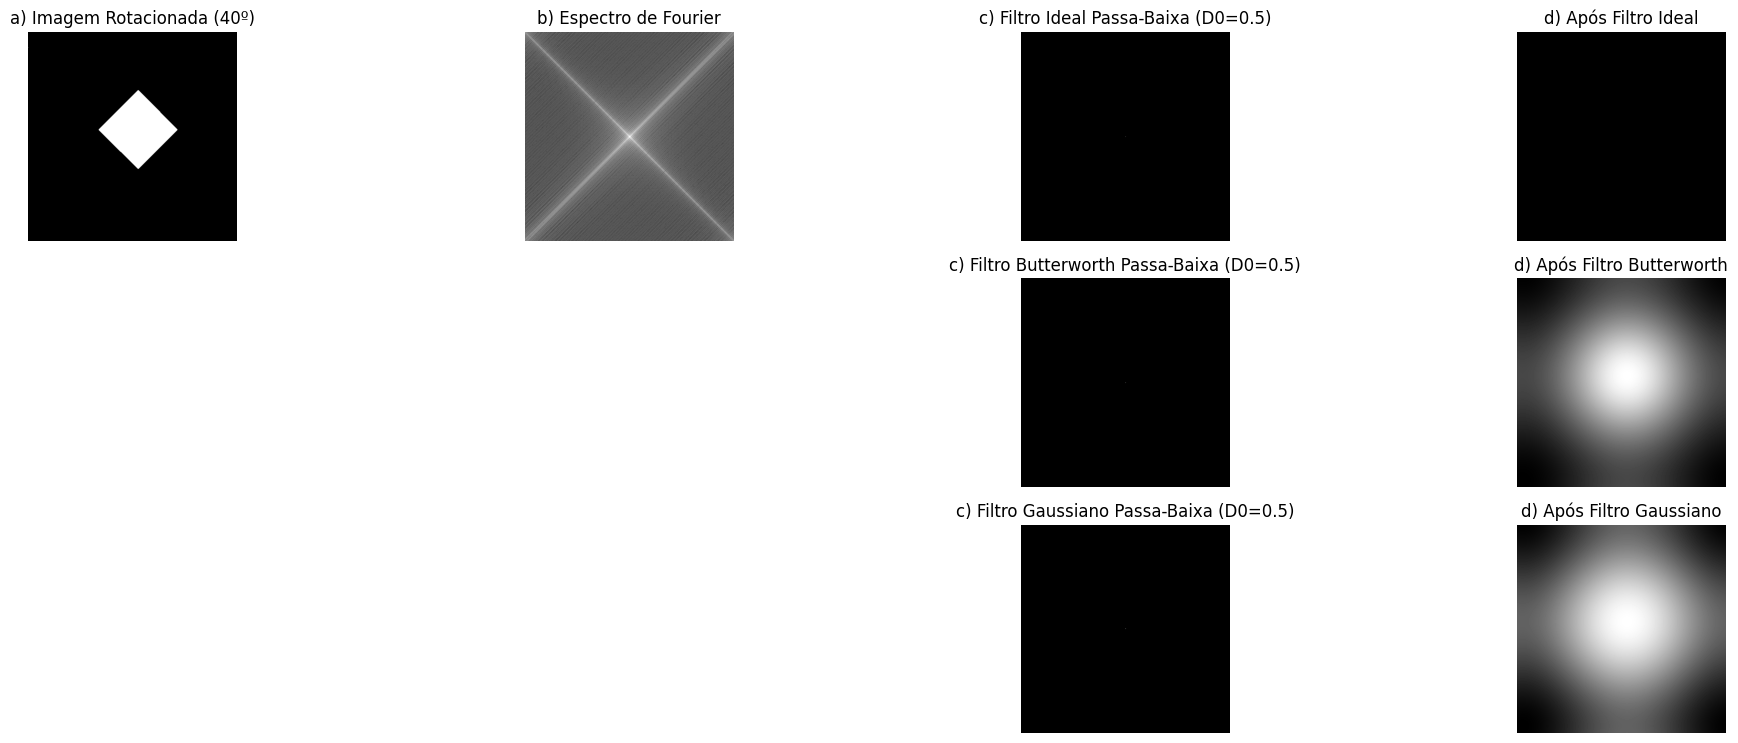

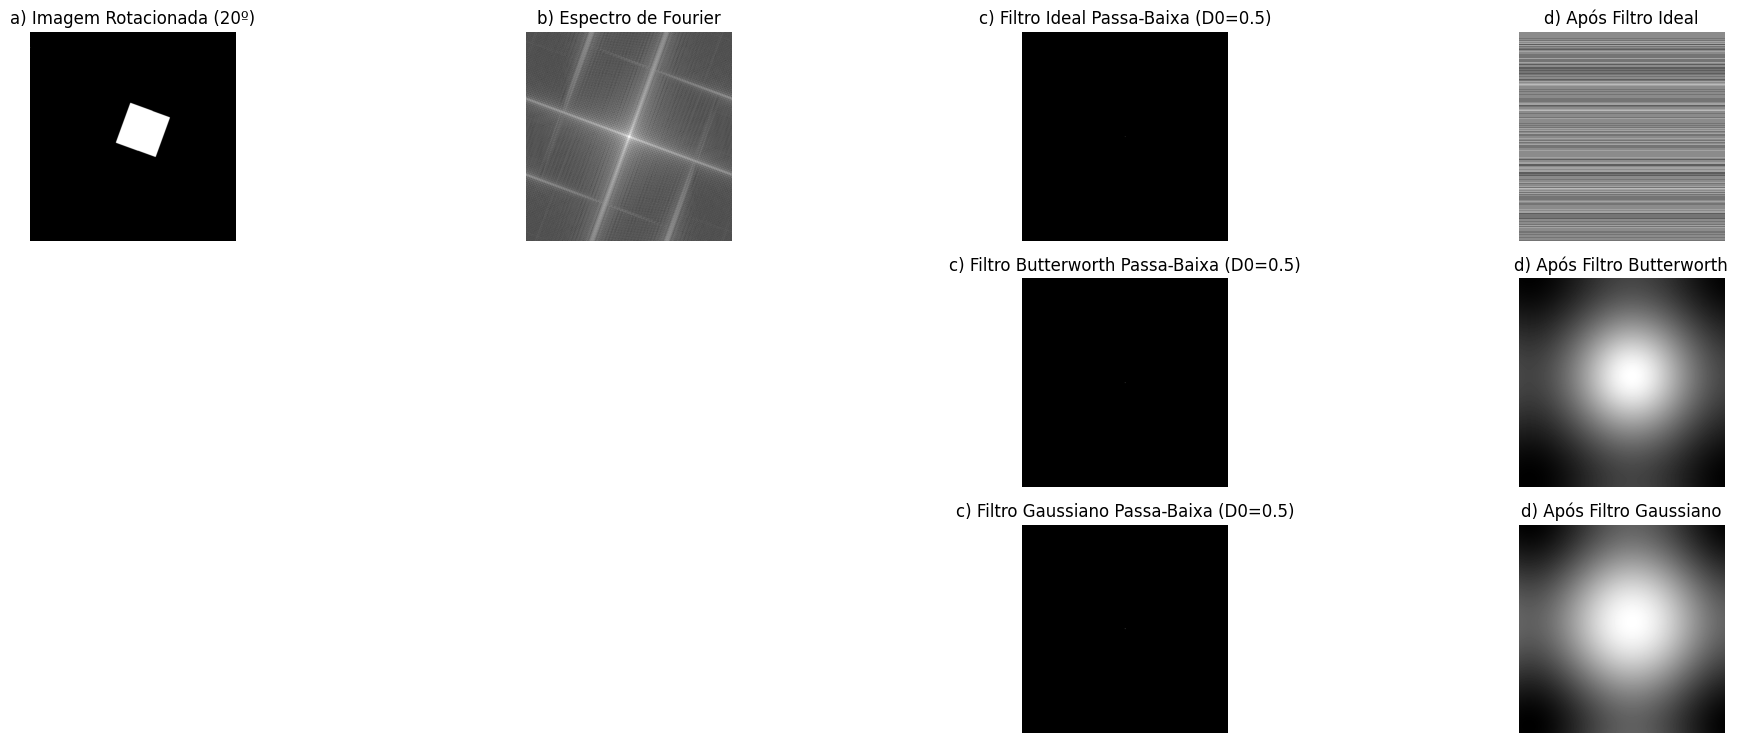

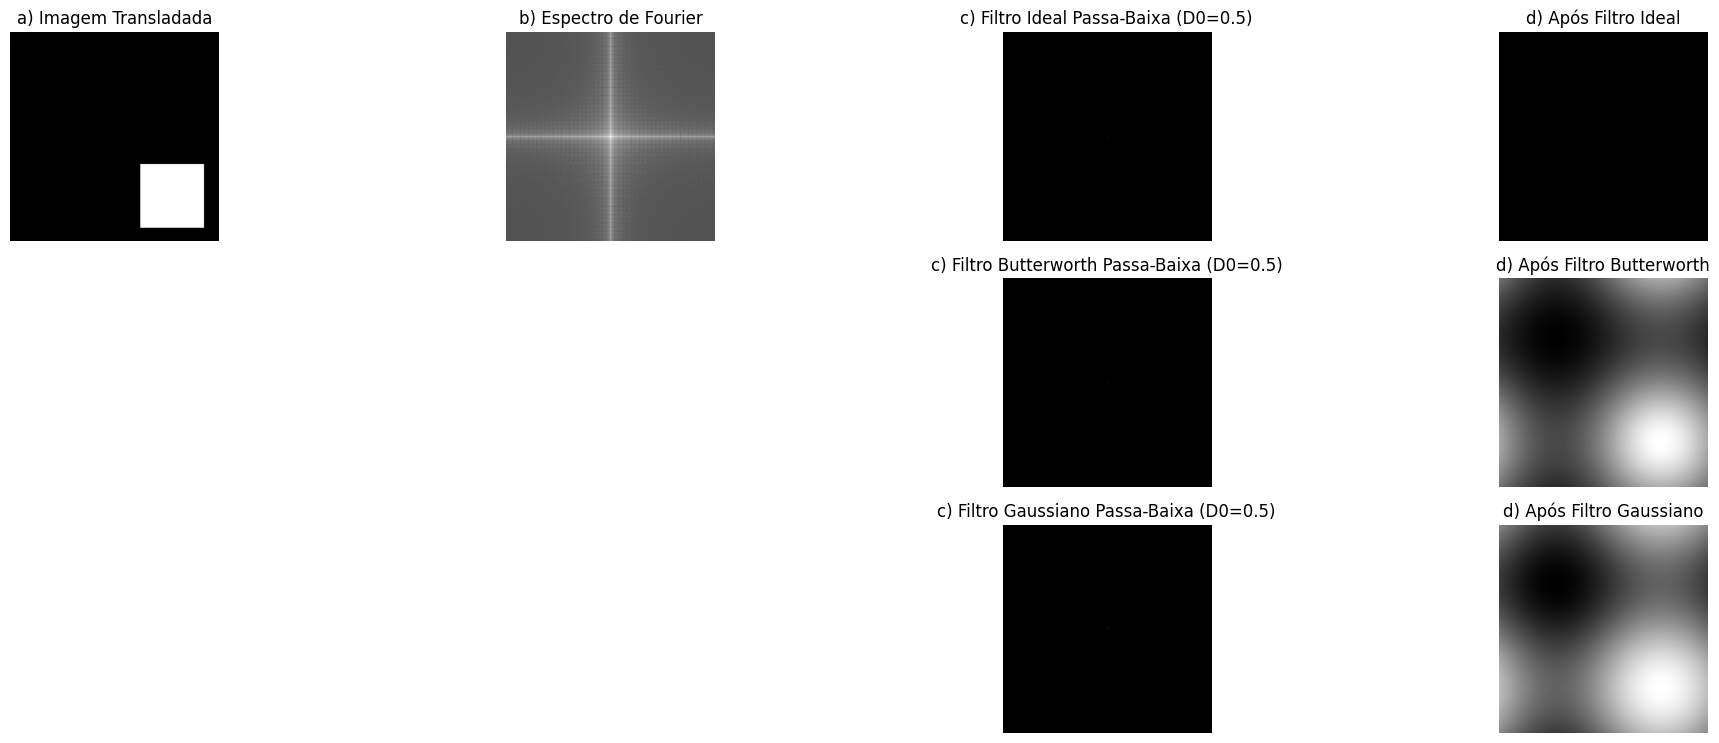

In [27]:
# Definindo os valores de D0 para variação
cutoffs = [0.01, 0.05, 0.5]

for cutoff in cutoffs:
    for idx, image in enumerate(images):
        # Fourier
        spectrum = fourier_spectrum(image)

        # Criação dos filtros
        ideal_lp = ideal_lowpass_filter(image, cutoff)
        butter_lp = butterworth_lowpass_filter(image, cutoff)
        gaussian_lp = gaussian_lowpass_filter(image, cutoff)

        # Aplicação dos filtros
        result_ideal = apply_filter(image, ideal_lp)
        result_butter = apply_filter(image, butter_lp)
        result_gaussian = apply_filter(image, gaussian_lp)

        # Exibição
        plt.figure(figsize=(20, 10))

        # Imagem original
        plt.subplot(4, 4, 1)
        plt.imshow(image, cmap='gray')
        plt.title(f'a) Imagem {titles[idx]}')
        plt.axis('off')

        # Espectro de Fourier
        plt.subplot(4, 4, 2)
        plt.imshow(spectrum, cmap='gray')
        plt.title('b) Espectro de Fourier')
        plt.axis('off')

        # Filtro passa-baixa Ideal
        plt.subplot(4, 4, 3)
        plt.imshow(ideal_lp, cmap='gray')
        plt.title(f'c) Filtro Ideal Passa-Baixa (D0={cutoff})')
        plt.axis('off')

        # Resultado filtro Ideal
        plt.subplot(4, 4, 4)
        plt.imshow(result_ideal, cmap='gray')
        plt.title('d) Após Filtro Ideal')
        plt.axis('off')

        # Filtro passa-baixa Butterworth
        plt.subplot(4, 4, 7)
        plt.imshow(butter_lp, cmap='gray')
        plt.title(f'c) Filtro Butterworth Passa-Baixa (D0={cutoff})')
        plt.axis('off')

        # Resultado filtro Butterworth
        plt.subplot(4, 4, 8)
        plt.imshow(result_butter, cmap='gray')
        plt.title('d) Após Filtro Butterworth')
        plt.axis('off')

        # Filtro passa-baixa Gaussiano
        plt.subplot(4, 4, 11)
        plt.imshow(gaussian_lp, cmap='gray')
        plt.title(f'c) Filtro Gaussiano Passa-Baixa (D0={cutoff})')
        plt.axis('off')

        # Resultado filtro Gaussiano
        plt.subplot(4, 4, 12)
        plt.imshow(result_gaussian, cmap='gray')
        plt.title('d) Após Filtro Gaussiano')
        plt.axis('off')

        # Ajusta o layout e mostra a figura
        plt.tight_layout()
        plt.show()


### Explicação dos resultados:

*       D0 = 0,01: Com uma frequência de corte extremamente baixa, esperamos que apenas as componentes de frequência muito baixa da imagem (quase a componente DC) sejam mantidas. A imagem resultante será, principalmente, uma versão muito suavizada ou "blurred" da imagem original.

*       D0 = 0,05: Com uma frequência de corte um pouco maior, mais componentes de frequência da imagem são mantidas. A imagem resultante ainda será suavizada, mas detalhes mais finos começarão a emergir em comparação com D0 = 0,01.

*       D0 = 0,5: Aqui, estamos mantendo a maioria das componentes de frequência baixa da imagem. A imagem resultante será mais próxima da imagem original do que as anteriores, com menos suavização.

*       À medida que aumentamos D0, os detalhes da imagem começam a aparecer devido à permissão de frequências mais altas. A diferença entre os três filtros (ideal, butterworth e gaussiano) estará na forma como eles atenuam as frequências perto do limite de corte. O filtro ideal tem uma transição abrupta, o filtro butterworth tem uma transição suave (com a ordem controlando a nitidez da transição) e o filtro gaussiano tem uma transição que segue uma distribuição gaussiana.

### 5.     Efetue o mesmo que se pede no item 4, mas use o filtro passa-alta em vez do filtro passa-baixa.

In [34]:
def ideal_highpass_filter(image, cutoff):
    rows, cols = image.shape
    center_x, center_y = rows // 2, cols // 2

    filter = np.ones((rows, cols))

    for i in range(rows):
        for j in range(cols):
            if np.sqrt((i - center_x) ** 2 + (j - center_y) ** 2) <= cutoff:
                filter[i, j] = 0
    return filter

def butterworth_highpass_filter(image, cutoff, order=2):
    rows, cols = image.shape
    center_x, center_y = rows // 2, cols // 2

    filter = np.ones((rows, cols))

    for i in range(rows):
        for j in range(cols):
            distance = np.sqrt((i - center_x) ** 2 + (j - center_y) ** 2)
            filter[i, j] = 1 / (1 + (cutoff / distance) ** (2 * order))

    return filter

def gaussian_highpass_filter(image, cutoff):
    rows, cols = image.shape
    center_x, center_y = rows // 2, cols // 2

    filter = np.ones((rows, cols))

    for i in range(rows):
        for j in range(cols):
            distance = np.sqrt((i - center_x) ** 2 + (j - center_y) ** 2)
            filter[i, j] -= np.exp(-(distance ** 2) / (2 * (cutoff ** 2)))

    return filter

def apply_filter(image, filter):
    # Aqui assumo que você está usando a Transformada de Fourier para aplicar o filtro.
    f = np.fft.fft2(image)
    fshift = np.fft.fftshift(f)
    fshift = fshift * filter
    f_ishift = np.fft.ifftshift(fshift)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)
    
    # Normalizando a imagem resultante para o intervalo [0, 255]
    img_normalized = np.divide(img_back - np.min(img_back), np.max(img_back) - np.min(img_back)) * 255
    
    return img_normalized



C:\Users\vinny\AppData\Local\Temp\ipykernel_19816\1729542887.py:22: RuntimeWarning: divide by zero encountered in double_scalars
  filter[i, j] = 1 / (1 + (cutoff / distance) ** (2 * order))


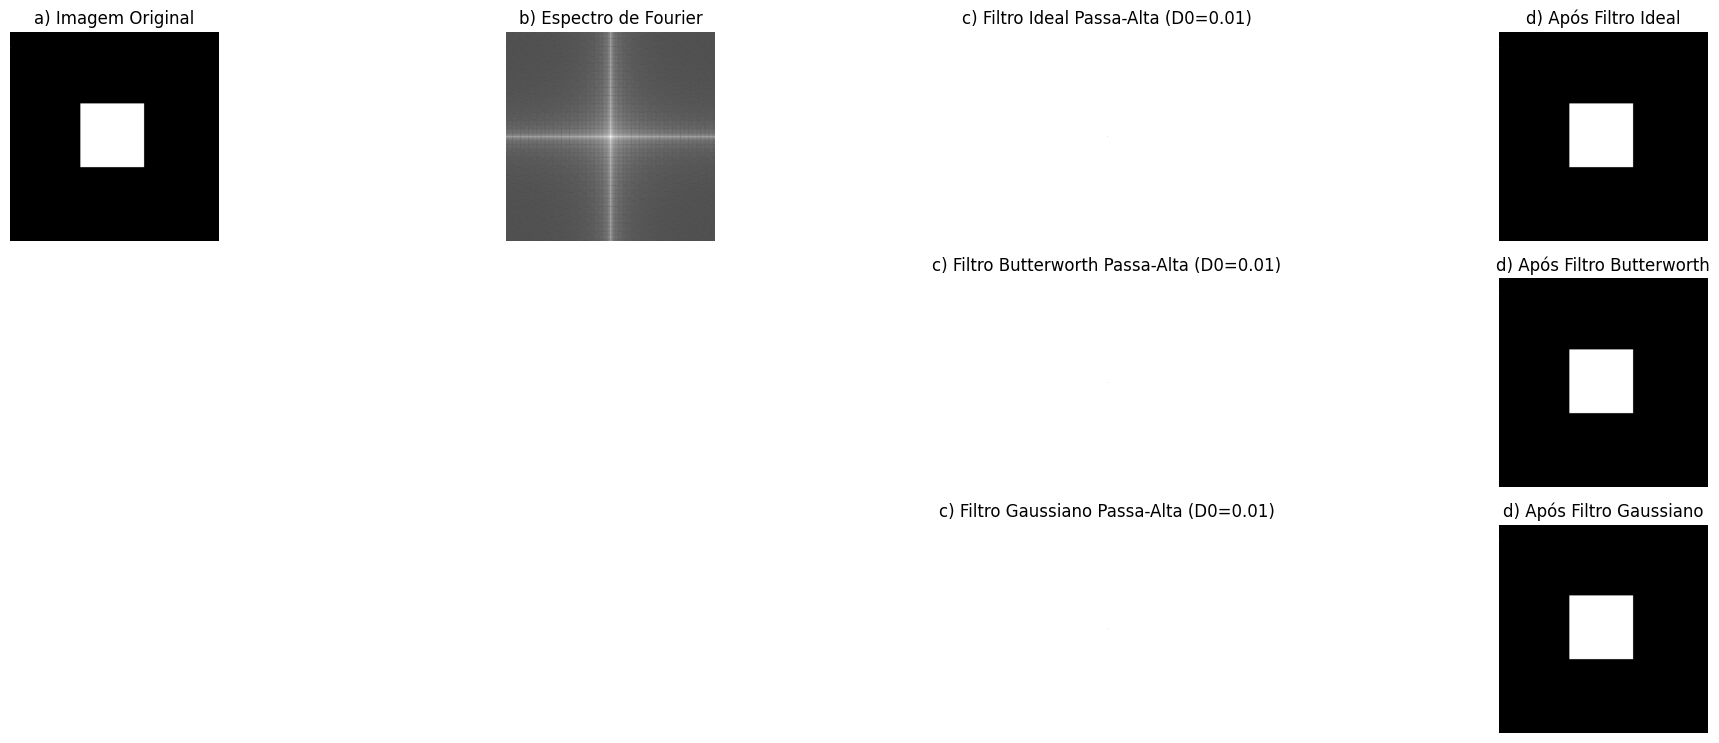

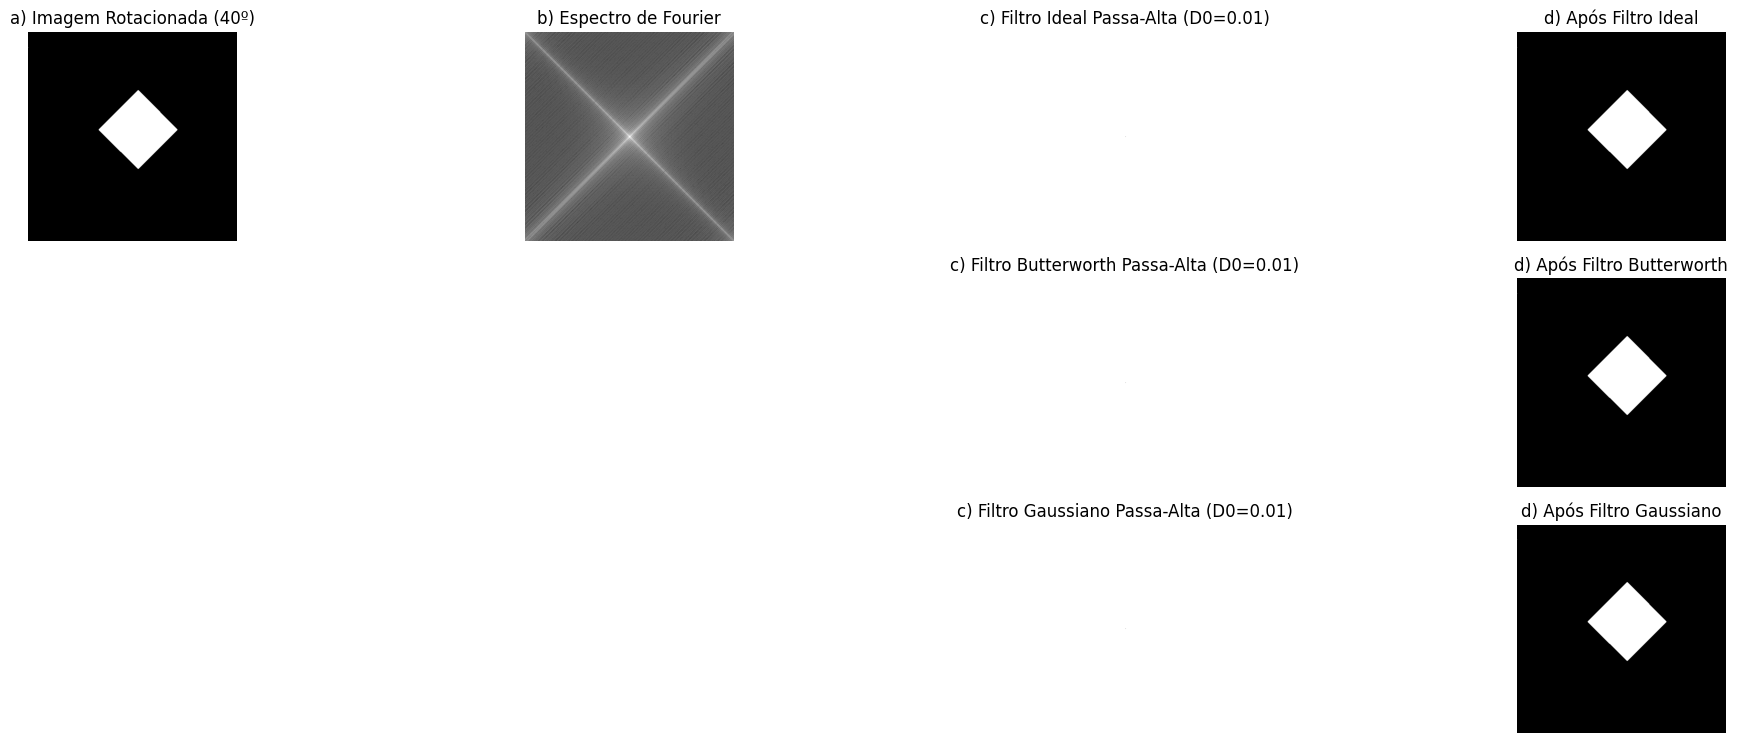

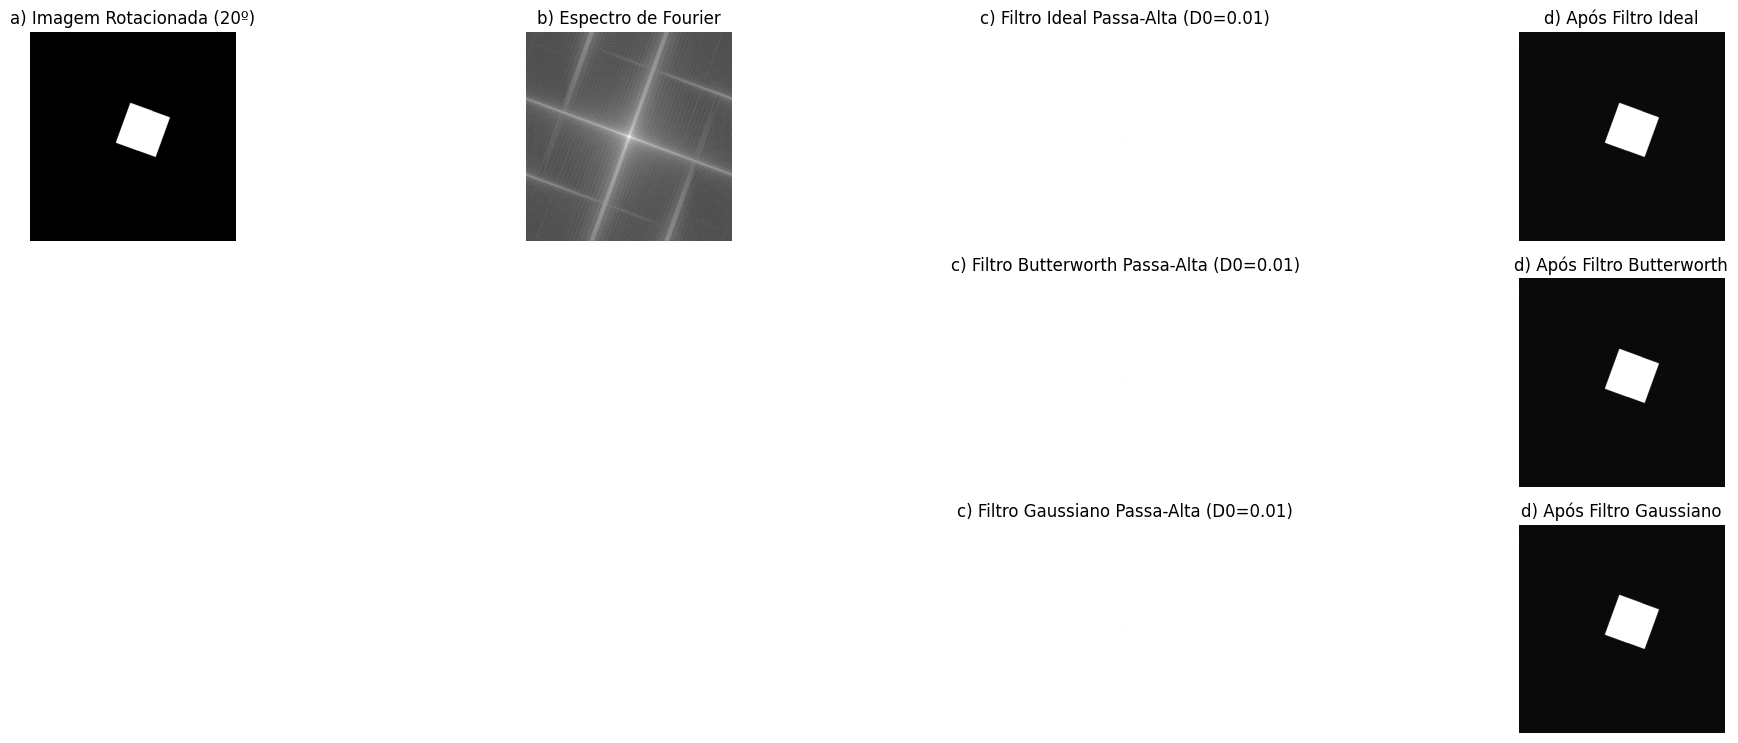

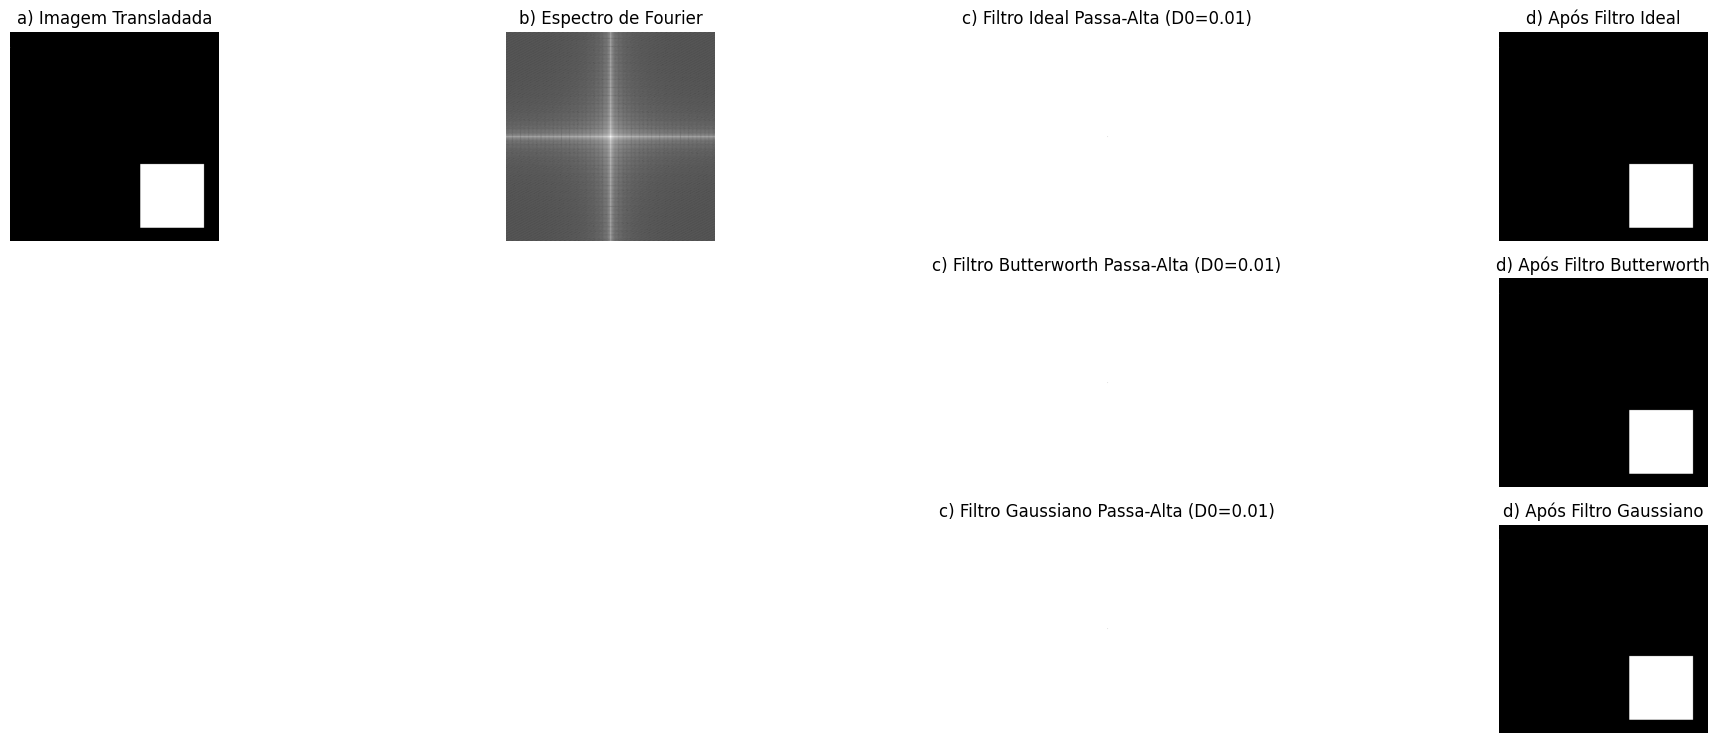

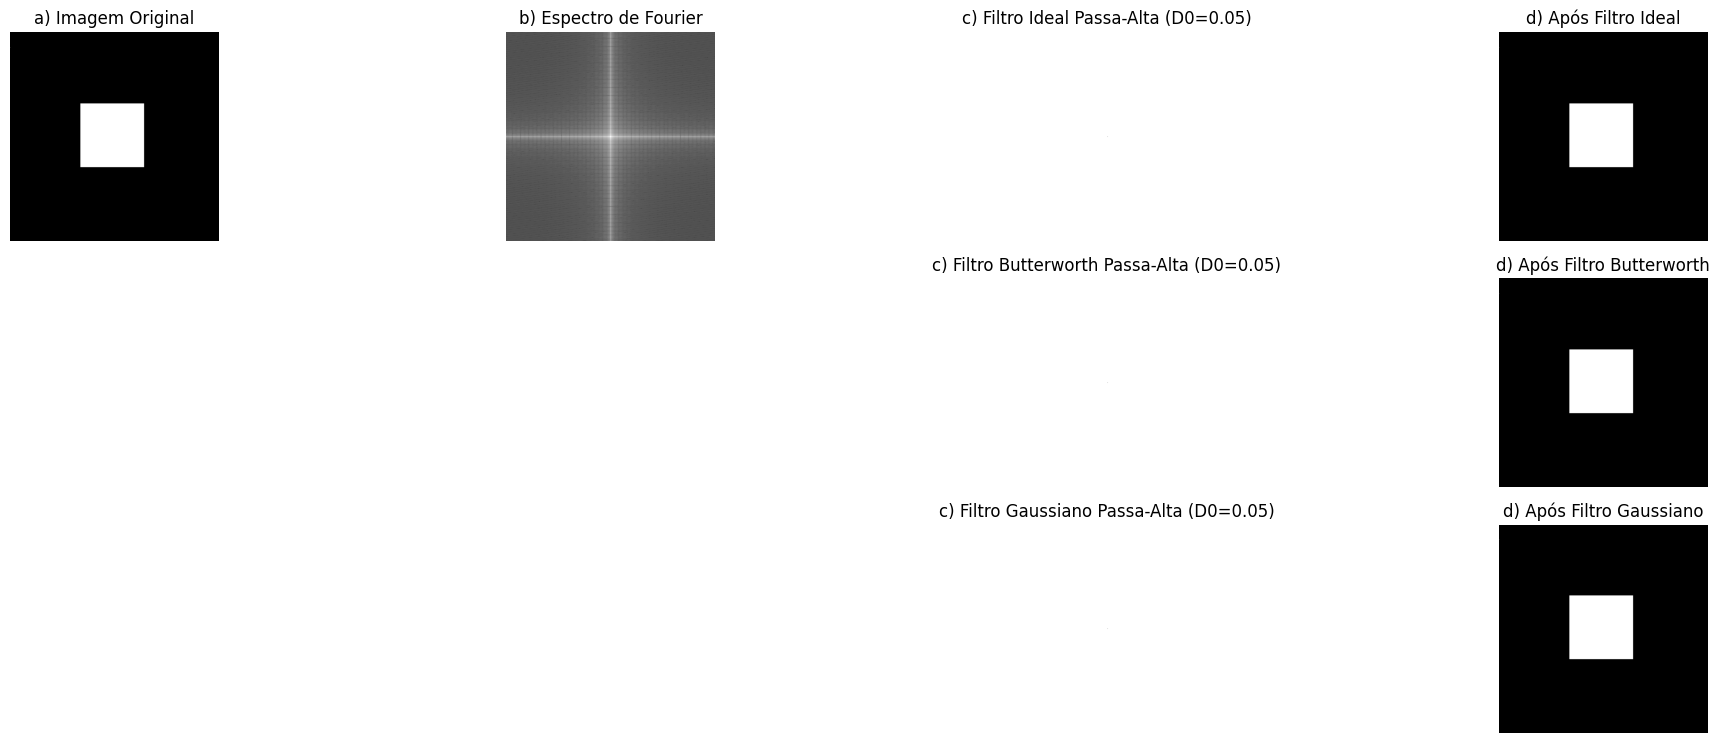

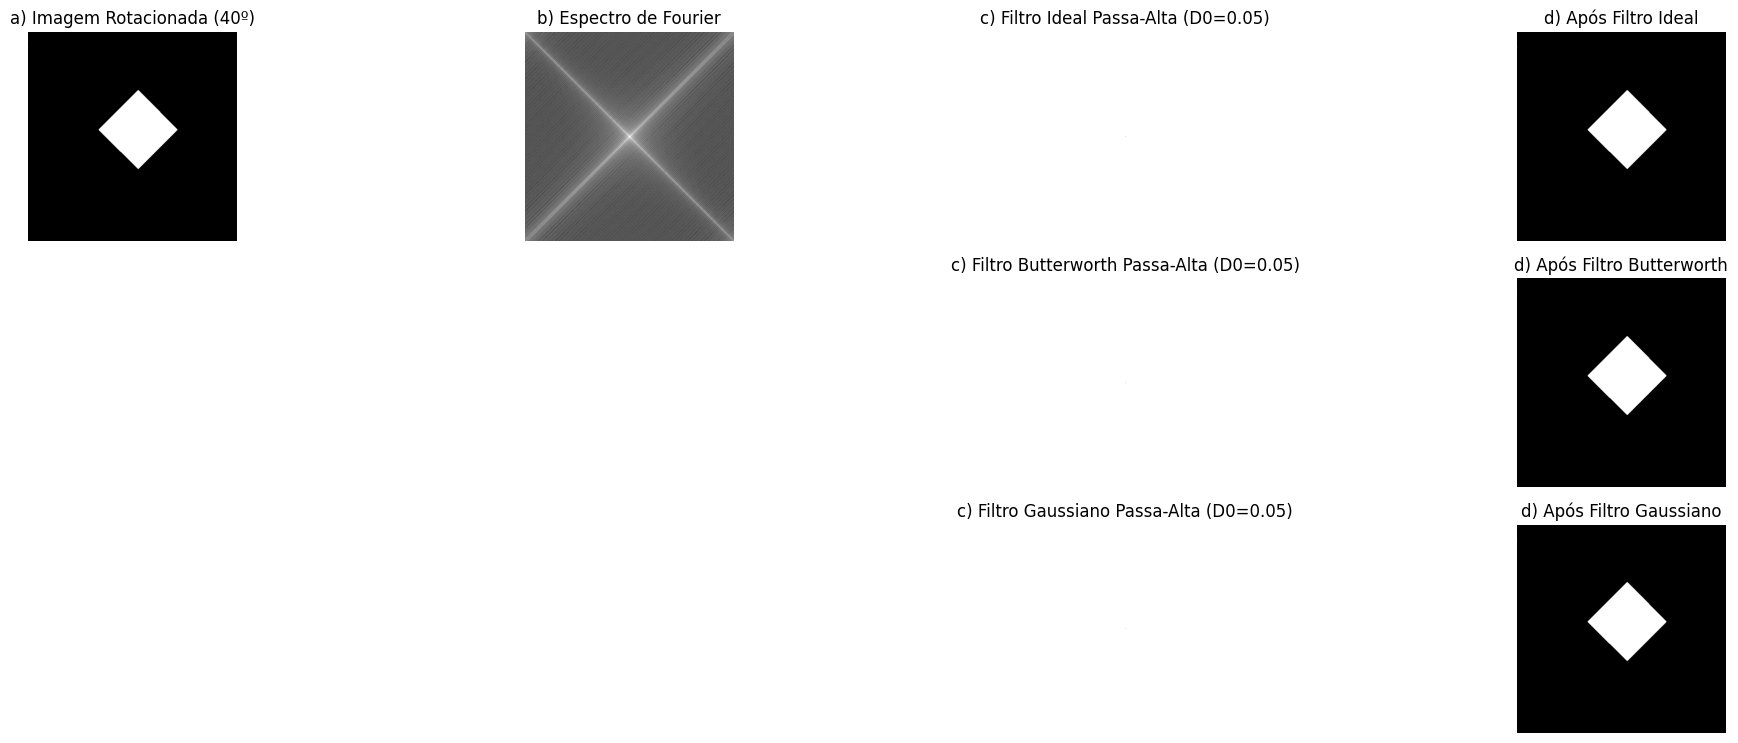

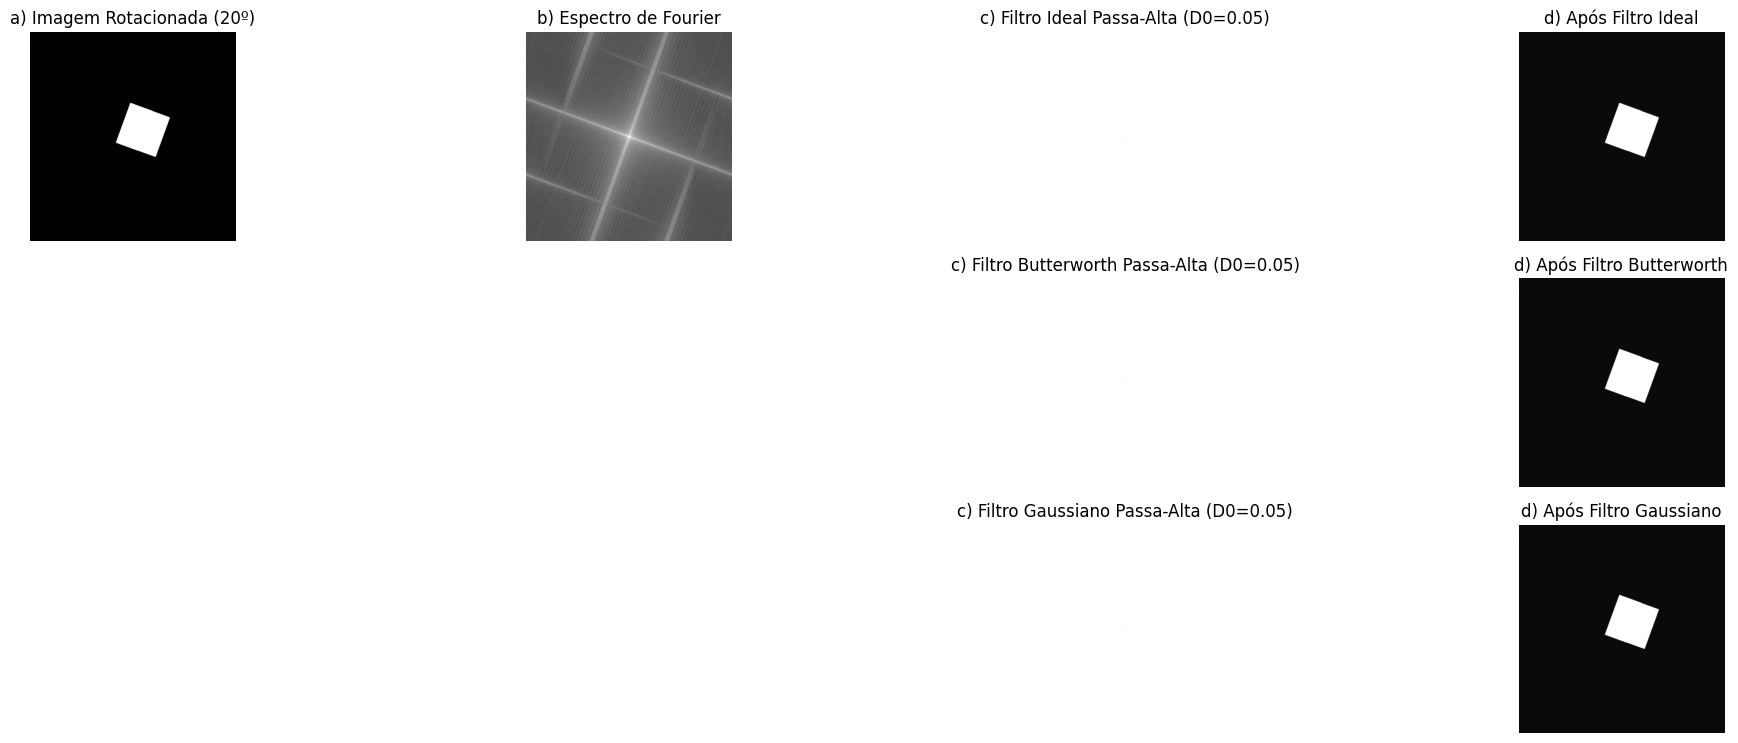

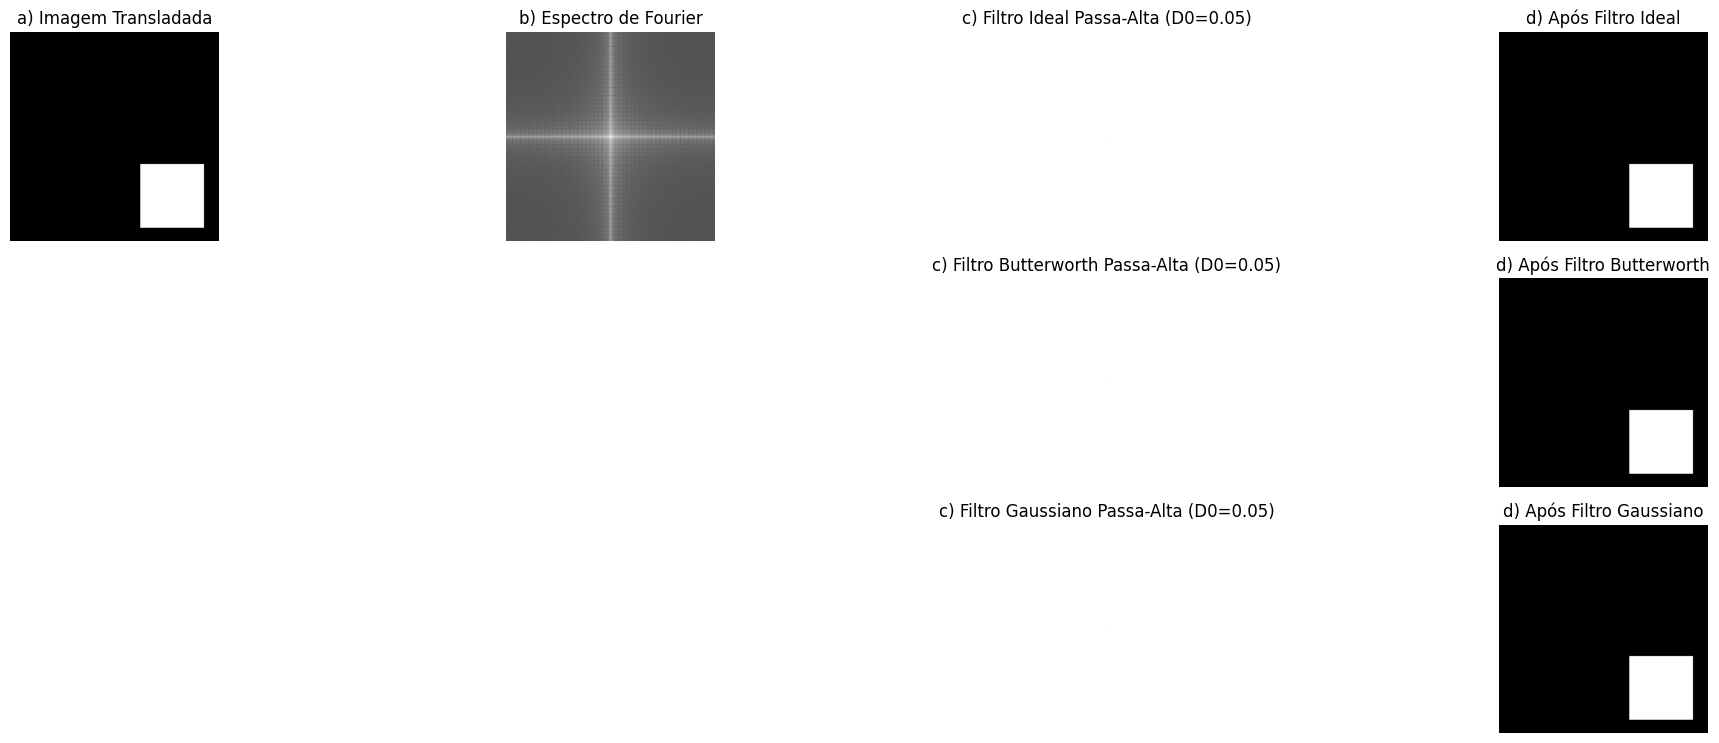

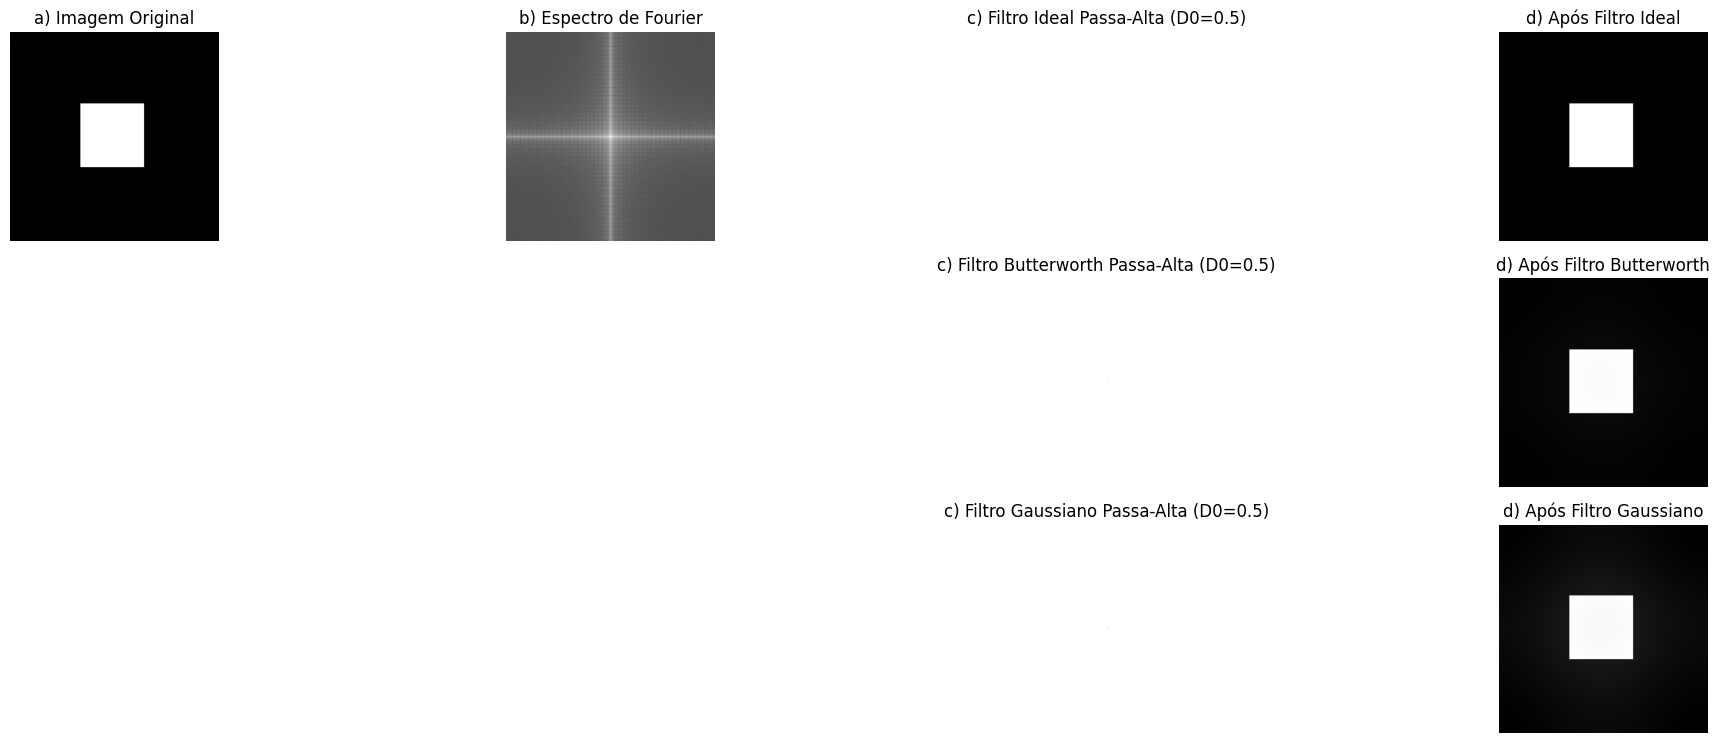

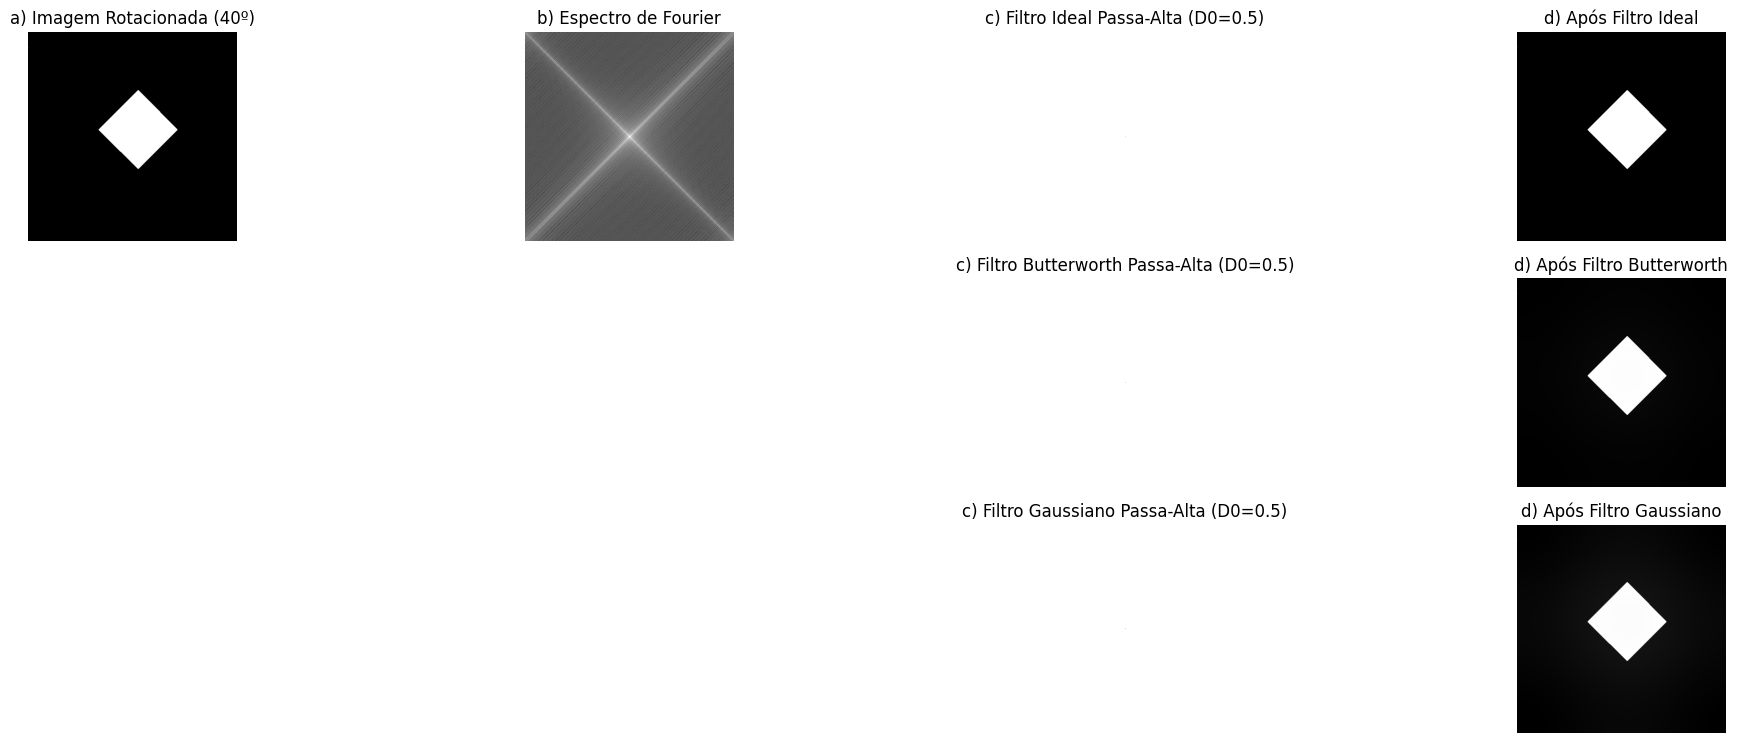

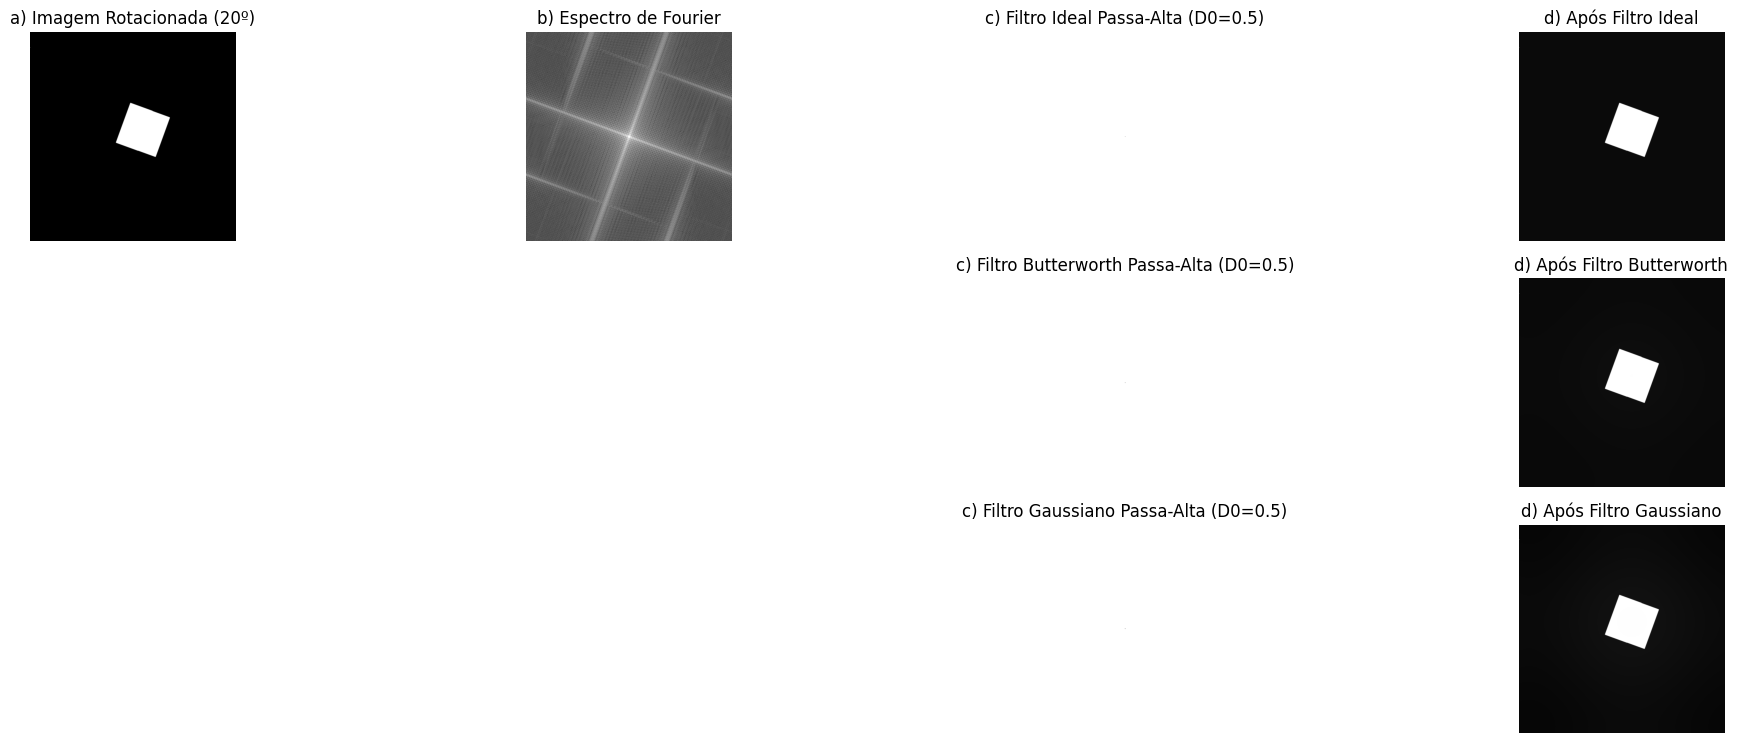

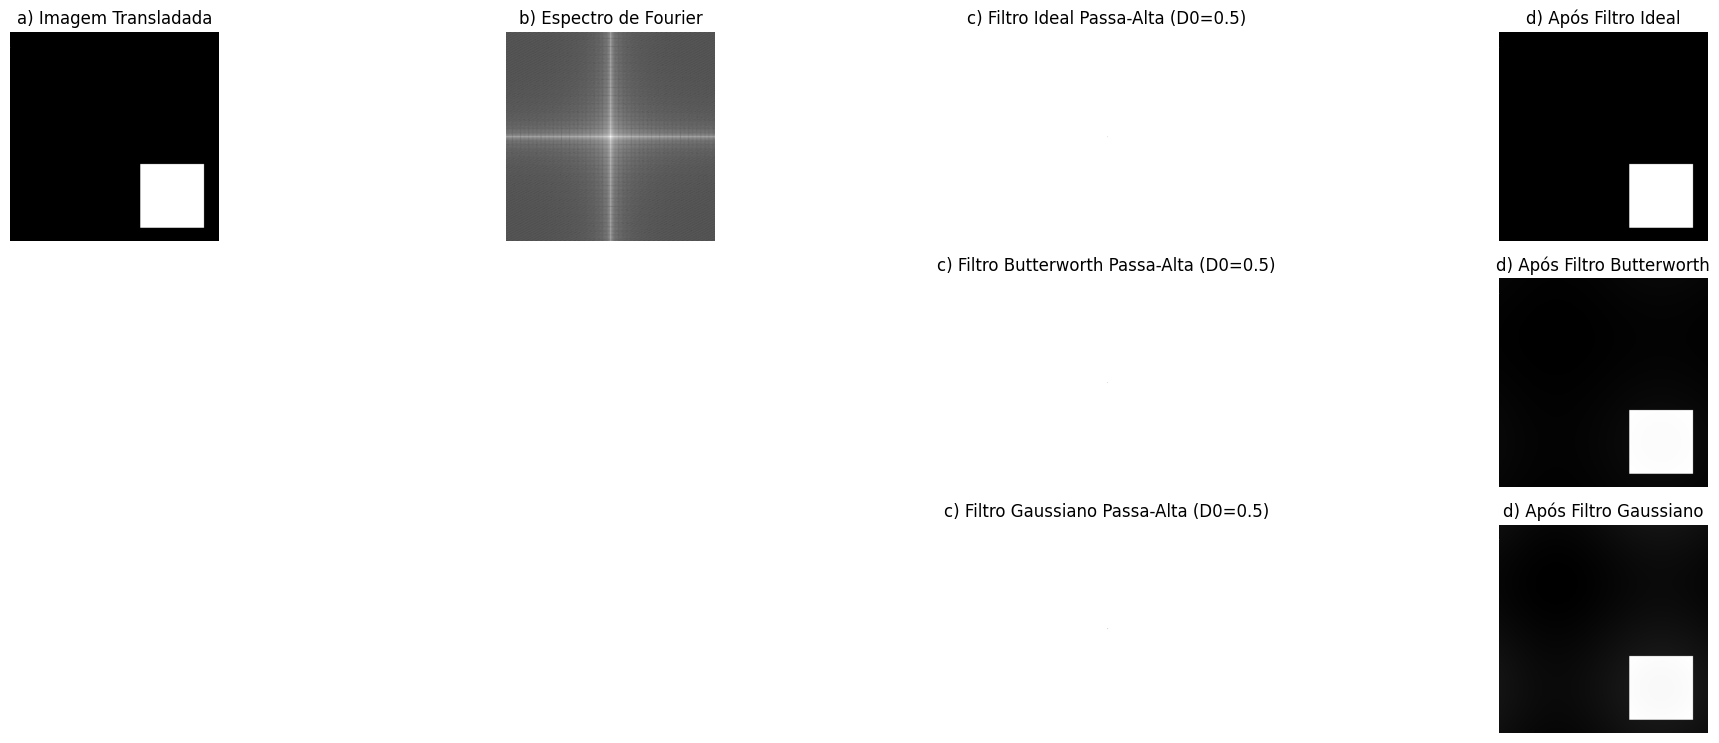

In [36]:
cutoffs = [0.01, 0.05, 0.5]

for cutoff in cutoffs:
    for idx, image in enumerate(images):
        # Fourier
        spectrum = fourier_spectrum(image)

        # Criação dos filtros
        ideal_hp = ideal_highpass_filter(image, cutoff)
        butter_hp = butterworth_highpass_filter(image, cutoff)
        gaussian_hp = gaussian_highpass_filter(image, cutoff)

        # Aplicação dos filtros
        result_ideal = apply_filter(image, ideal_hp)
        result_butter = apply_filter(image, butter_hp)
        result_gaussian = apply_filter(image, gaussian_hp)

        # Exibição
        plt.figure(figsize=(20, 10))

        # Imagem original
        plt.subplot(4, 4, 1)
        plt.imshow(image, cmap='gray')
        plt.title(f'a) Imagem {titles[idx]}')
        plt.axis('off')

        # Espectro de Fourier
        plt.subplot(4, 4, 2)
        plt.imshow(spectrum, cmap='gray')
        plt.title('b) Espectro de Fourier')
        plt.axis('off')

        # Filtro passa-alta Ideal
        plt.subplot(4, 4, 3)
        plt.imshow(ideal_hp, cmap='gray')
        plt.title(f'c) Filtro Ideal Passa-Alta (D0={cutoff})')
        plt.axis('off')

        # Resultado filtro Ideal
        plt.subplot(4, 4, 4)
        plt.imshow(result_ideal, cmap='gray')
        plt.title('d) Após Filtro Ideal')
        plt.axis('off')

        # Filtro passa-alta Butterworth
        plt.subplot(4, 4, 7)
        plt.imshow(butter_hp, cmap='gray')
        plt.title(f'c) Filtro Butterworth Passa-Alta (D0={cutoff})')
        plt.axis('off')

        # Resultado filtro Butterworth
        plt.subplot(4, 4, 8)
        plt.imshow(result_butter, cmap='gray')
        plt.title('d) Após Filtro Butterworth')
        plt.axis('off')

        # Filtro passa-alta Gaussiano
        plt.subplot(4, 4, 11)
        plt.imshow(gaussian_hp, cmap='gray')
        plt.title(f'c) Filtro Gaussiano Passa-Alta (D0={cutoff})')
        plt.axis('off')

        # Resultado filtro Gaussiano
        plt.subplot(4, 4, 12)
        plt.imshow(result_gaussian, cmap='gray')
        plt.title('d) Após Filtro Gaussiano')
        plt.axis('off')

        # Ajusta o layout e mostra a figura
        plt.tight_layout()
        plt.show()


*    D0 = 0,01: Com uma frequência de corte tão baixa no filtro passa-alta, a maior parte da energia da imagem será mantida, resultando em uma imagem quase idêntica à original.

*    D0 = 0,05: A imagem resultante começará a mostrar mais detalhes de alta frequência, como bordas e texturas. Áreas suaves da imagem serão mais atenuadas.

*    D0 = 0,5: Aqui, grande parte das baixas frequências são eliminadas, deixando principalmente os detalhes de alta frequência, como bordas. A imagem resultante aparecerá com mais contraste nas bordas.

*    Os filtros passa-alta realçam os detalhes de alta frequência da imagem. A diferença entre os três filtros (ideal, butterworth e gaussiano) reside na forma como eles atenuam as frequências próximas ao limite de corte.

### 6.      Além dos filtros passa-baixa e passa-alta também existe o filtro passa-banda? Explique seu funcionamento e aplique um filtro passa-banda na imagem.

### Funcionamento do Filtro Passa-Banda:
O filtro passa-banda é projetado para permitir apenas as frequências que estão dentro de uma certa faixa, rejeitando frequências abaixo e acima dessa faixa. É essencialmente a combinação de um filtro passa-alta e um filtro passa-baixa. Especificamente, um filtro passa-banda pode ser obtido multiplicando um filtro passa-baixa por um filtro passa-alta.

A resposta de um filtro passa-banda H(u, v) para uma frequência de corte inferior Dl e uma frequência de corte superior Dh é definido como:

H(u, v) = H_HP(u, v) * H_LP(u, v)

onde:

H_HP(u, v) é a resposta de um filtro passa-alta com frequência de corte Dl.
H_LP(u, v) é a resposta de um filtro passa-baixa com frequência de corte Dh.

### Aplicação do Filtro Passa-Banda na Imagem:

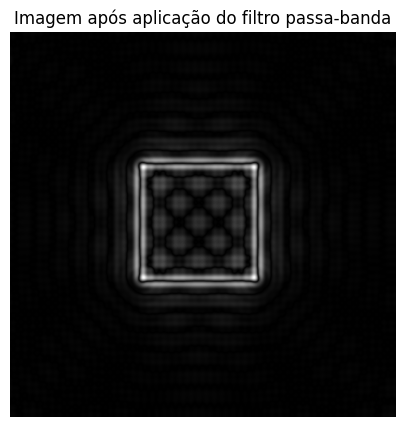

In [37]:
def ideal_bandpass_filter(image, Dl, Dh):
    """Cria um filtro passa-banda ideal."""
    rows, cols = image.shape
    center_x, center_y = rows // 2, cols // 2
    filter = np.zeros((rows, cols), dtype=np.uint8)

    for x in range(rows):
        for y in range(cols):
            distance = np.sqrt((x - center_x)**2 + (y - center_y)**2)
            if Dl <= distance <= Dh:
                filter[x, y] = 1
                
    return filter

def apply_bandpass_filter(image, Dl, Dh):
    """Aplica o filtro passa-banda na imagem."""
    bandpass_filter = ideal_bandpass_filter(image, Dl, Dh)
    filtered_image = apply_filter(image, bandpass_filter)
    return filtered_image

# Aplicando o filtro
Dl = 10
Dh = 50
filtered_image = apply_bandpass_filter(sinc_original, Dl, Dh)

# Exibindo a imagem resultante
plt.figure(figsize=(10, 5))
plt.imshow(filtered_image, cmap='gray')
plt.title("Imagem após aplicação do filtro passa-banda")
plt.axis('off')
plt.show()


*       Este código cria um filtro passa-banda ideal com uma frequência de corte inferior Dl e uma frequência de corte superior Dh e, em seguida, aplica esse filtro à imagem sinc_original. Você pode ajustar Dl e Dh conforme necessário.